# simulate signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # rmse

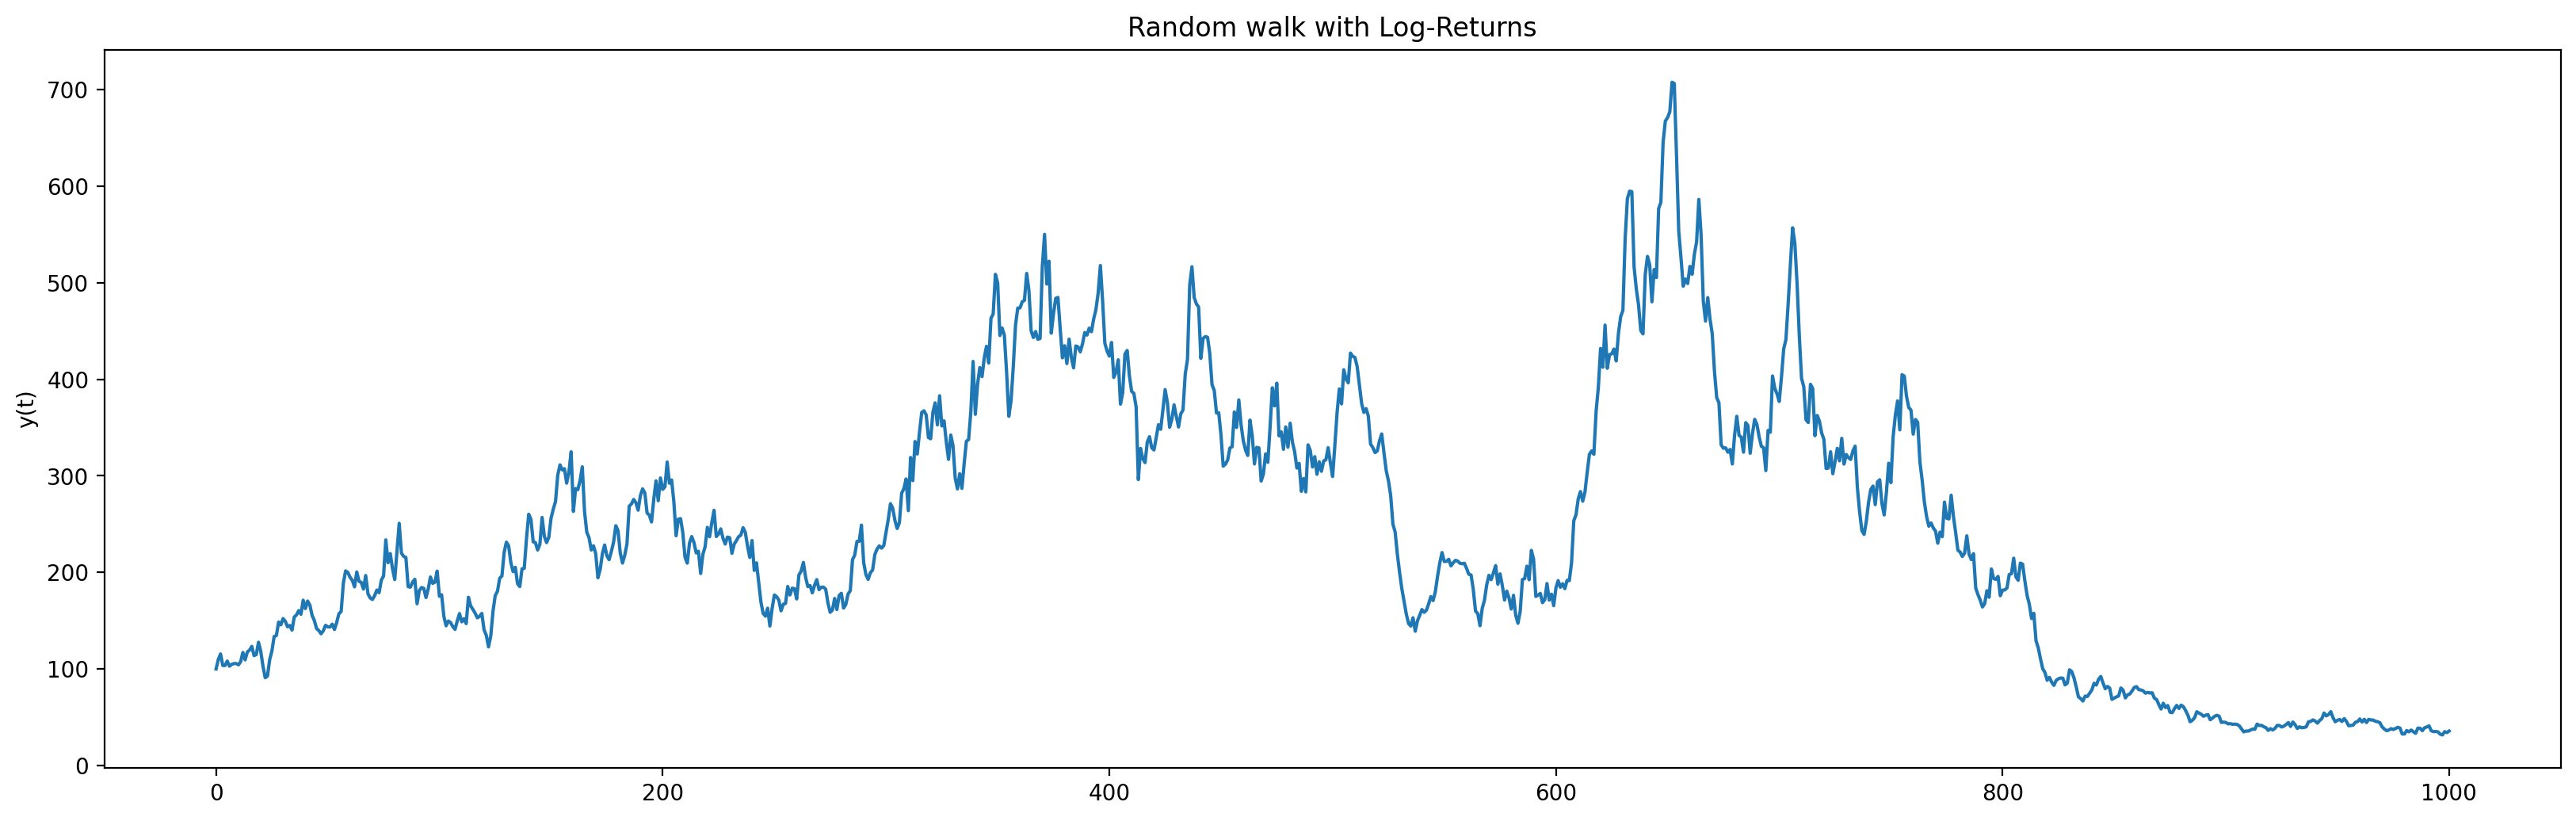

In [97]:
#generate a random walk with log returns
np.random.seed(10)
n = 1000 
p0 = 100 
i = np.random.normal(size=n) * np.sqrt(0.005)
y_t = p0 * np.exp(np.cumsum(i, axis=0)) 
y_t = np.concatenate(([p0],y_t),axis=0)
plt.figure(figsize=(20,6),dpi=200)
plt.ylabel('y(t)')
plt.title('Random walk with Log-Returns')
plt.plot(y_t)
plt.savefig("./random walk pure data")

# add noise

In [5]:
from PyEMD import EMD,EEMD,CEEMDAN,Visualisation
from PyEMD.checks import whitenoise_check
import pandas as pd

In [92]:
def add_noise(signal,target,show = False):
    np.random.seed(11)
    x_watts = signal ** 2
   # Adding noise using target SNR
   # Set a target SNR
    target_snr_db = target
    #t = np.linspace(0, 9, 9000)
    # Calculate signal power and convert to dB 
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    # Calculate noise according to [2] then convert to watts
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    # Generate an sample of white noise
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    # Noise up the original signal
    y_volts = signal + noise_volts

    if show:
        # Plot signal with noise
        plt.figure(figsize=(20,6),dpi=200)
        plt.plot(y_volts)
        plt.title('Analog signal with SNR of '+ str(target)+ 'dB')
        plt.ylabel('x(t)')
        plt.xlabel('Time (s)')
        plt.savefig("./Analog signal with noise"+str(target)+" .jpg")
        plt.show()
    
    return y_volts

In [7]:
def emd_denoise(data,mode):
    if mode == 'emd':
        decom = EMD()
    if mode == 'eemd':
        decom = EEMD()
    if mode == 'ceemdan':
        decom = CEEMDAN()
    imfs = decom(data)
    imf_num = imfs.shape[0]
    significant_imfs = whitenoise_check(imfs)
    denoised_data = np.array([0]*len(data))
    #print(significant_imfs)
    for i in significant_imfs:
        if significant_imfs[i] ==1:
            denoised_data = denoised_data+imfs[i-1]
    return denoised_data,imf_num

In [8]:
def calculate_snr(signal,nsiganl):
    R = signal**2
    N1 = nsiganl - signal
    N1_square = N1**2
    snr = 10 * np.log10(sum(R)/sum(N1_square))
    return snr

# plot 4 noisy signals

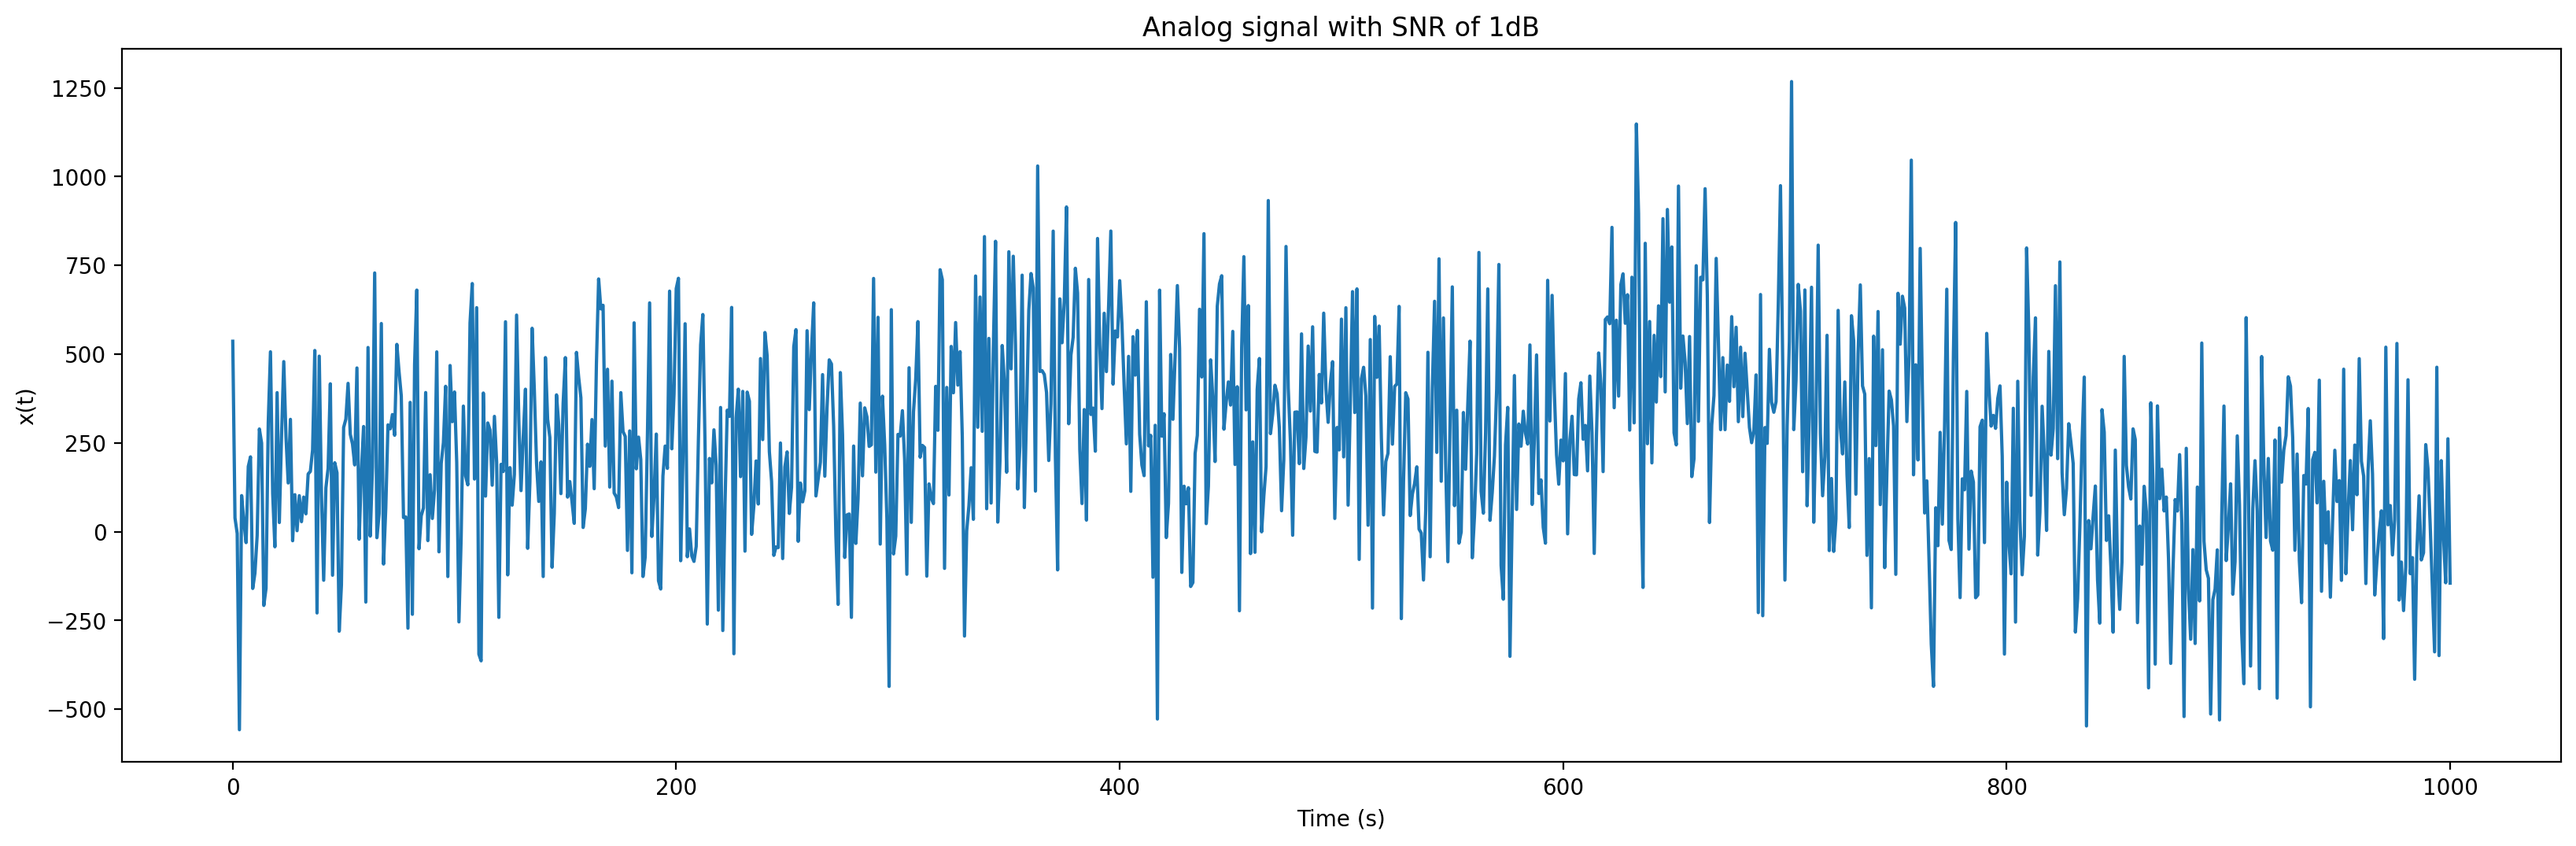

In [93]:
#example
noisy = add_noise(y_t,1,show = True)

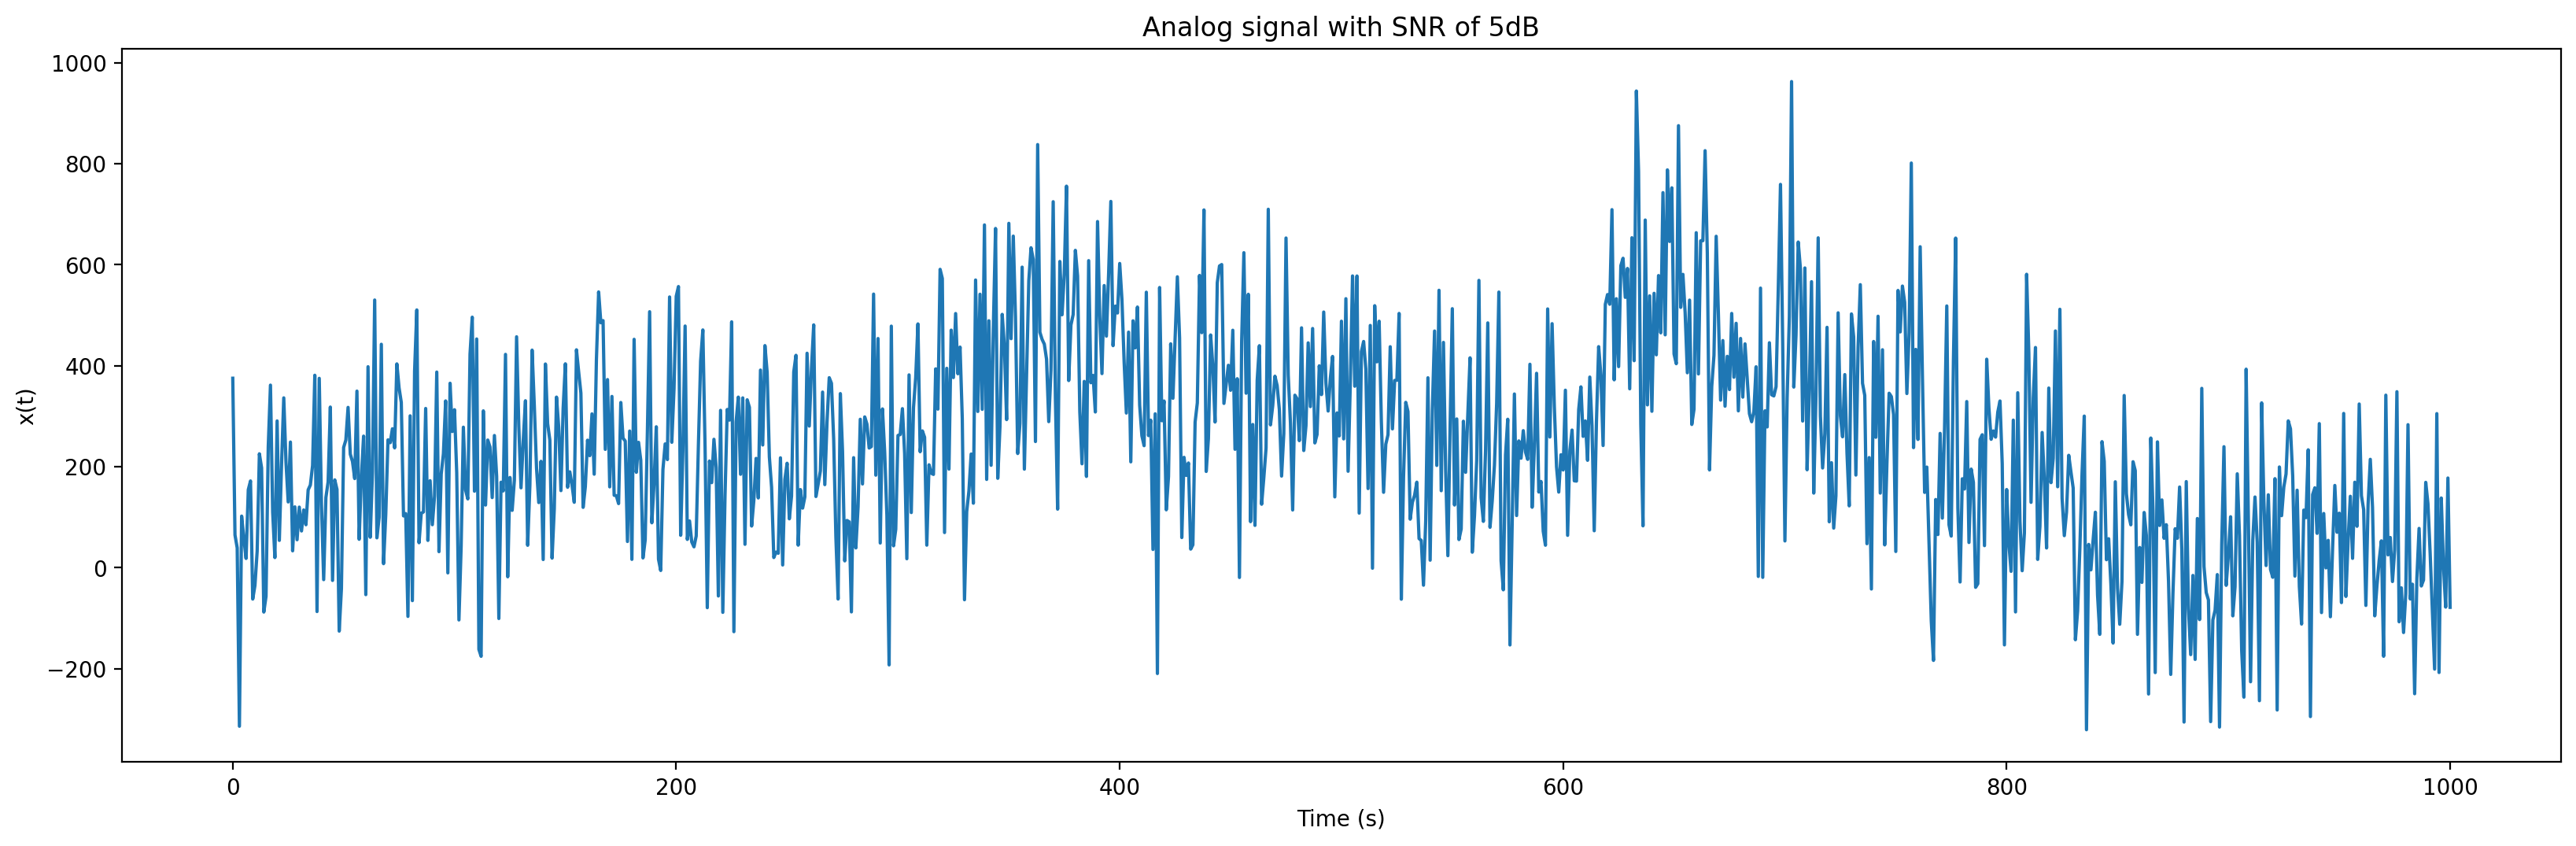

In [94]:
#example
noisy = add_noise(y_t,5,show = True)

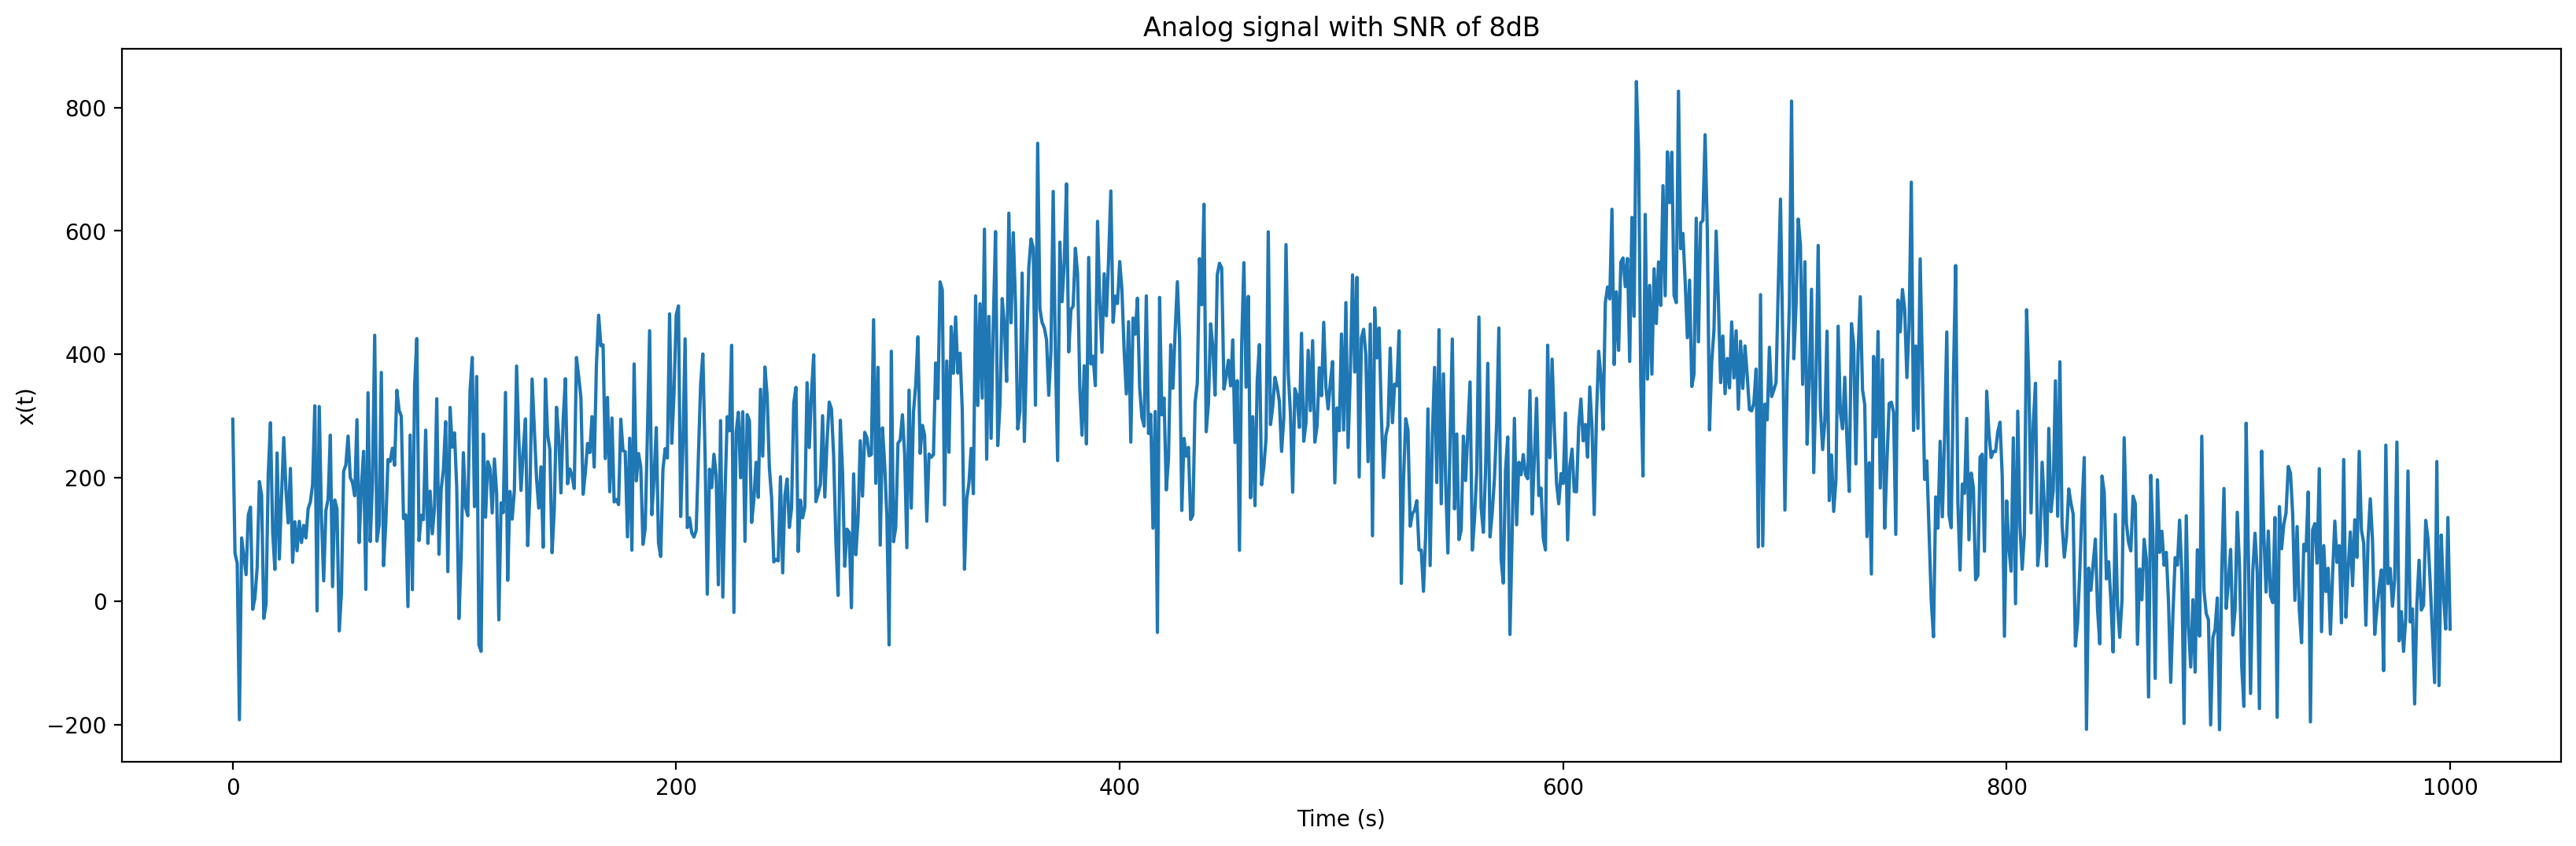

In [95]:
#example
noisy = add_noise(y_t,8,show = True)

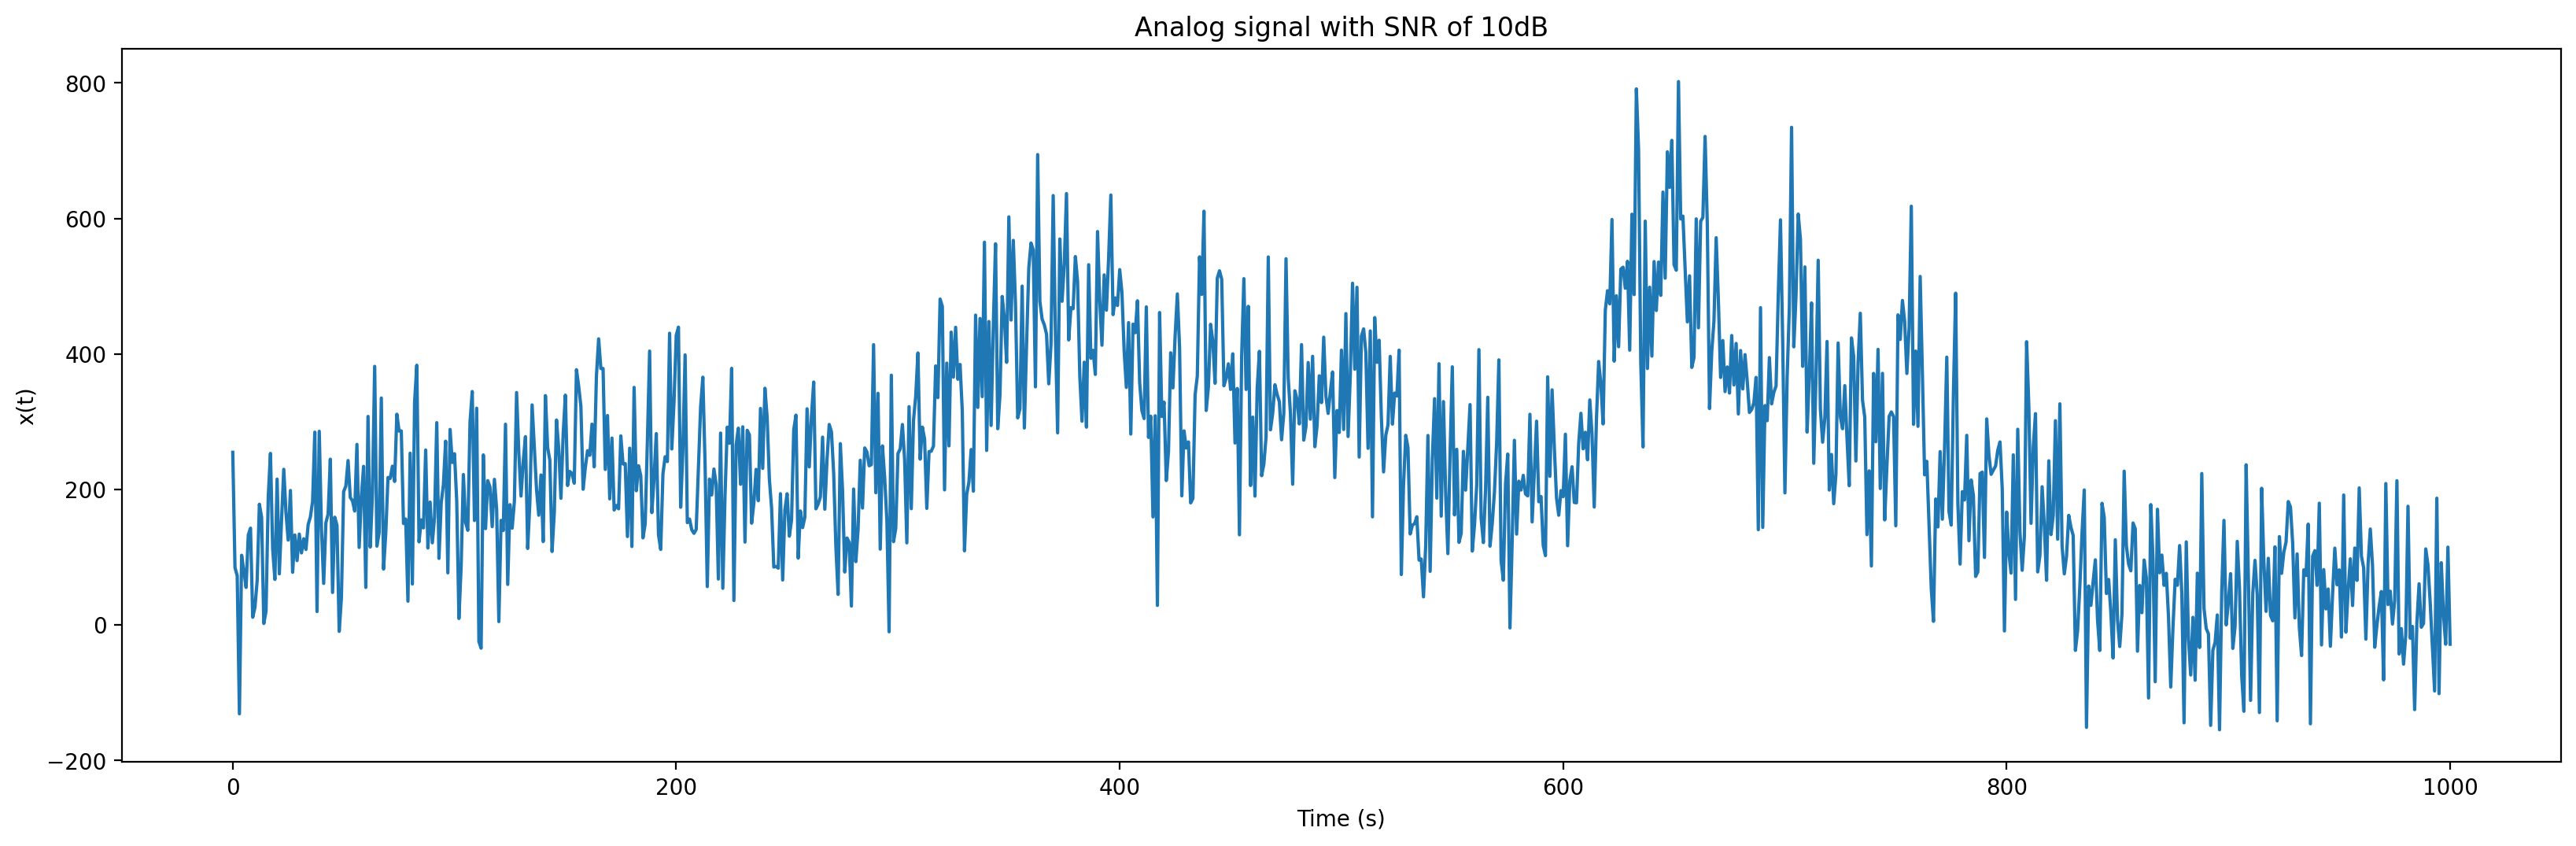

In [96]:
#example
noisy = add_noise(y_t,10,show = True)

# plot 5 lines with different noise

# emd

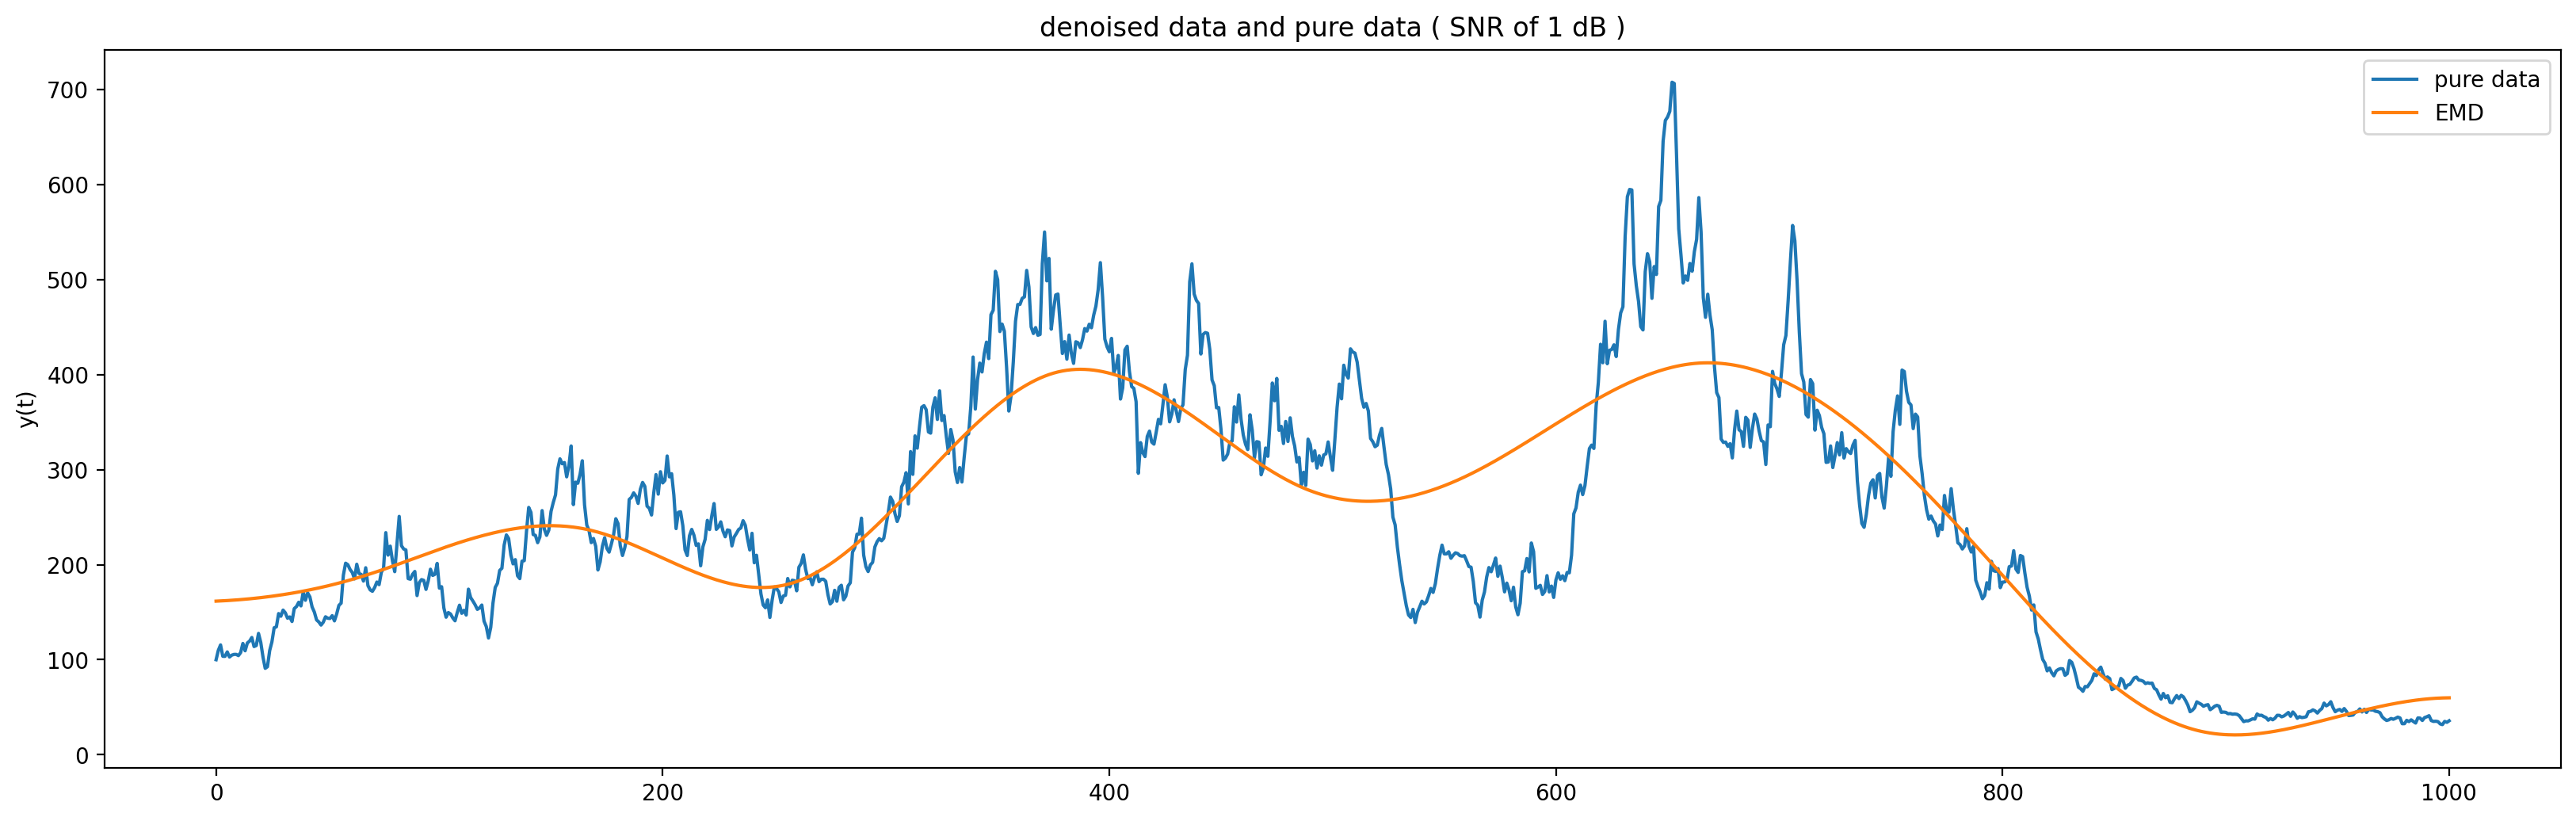

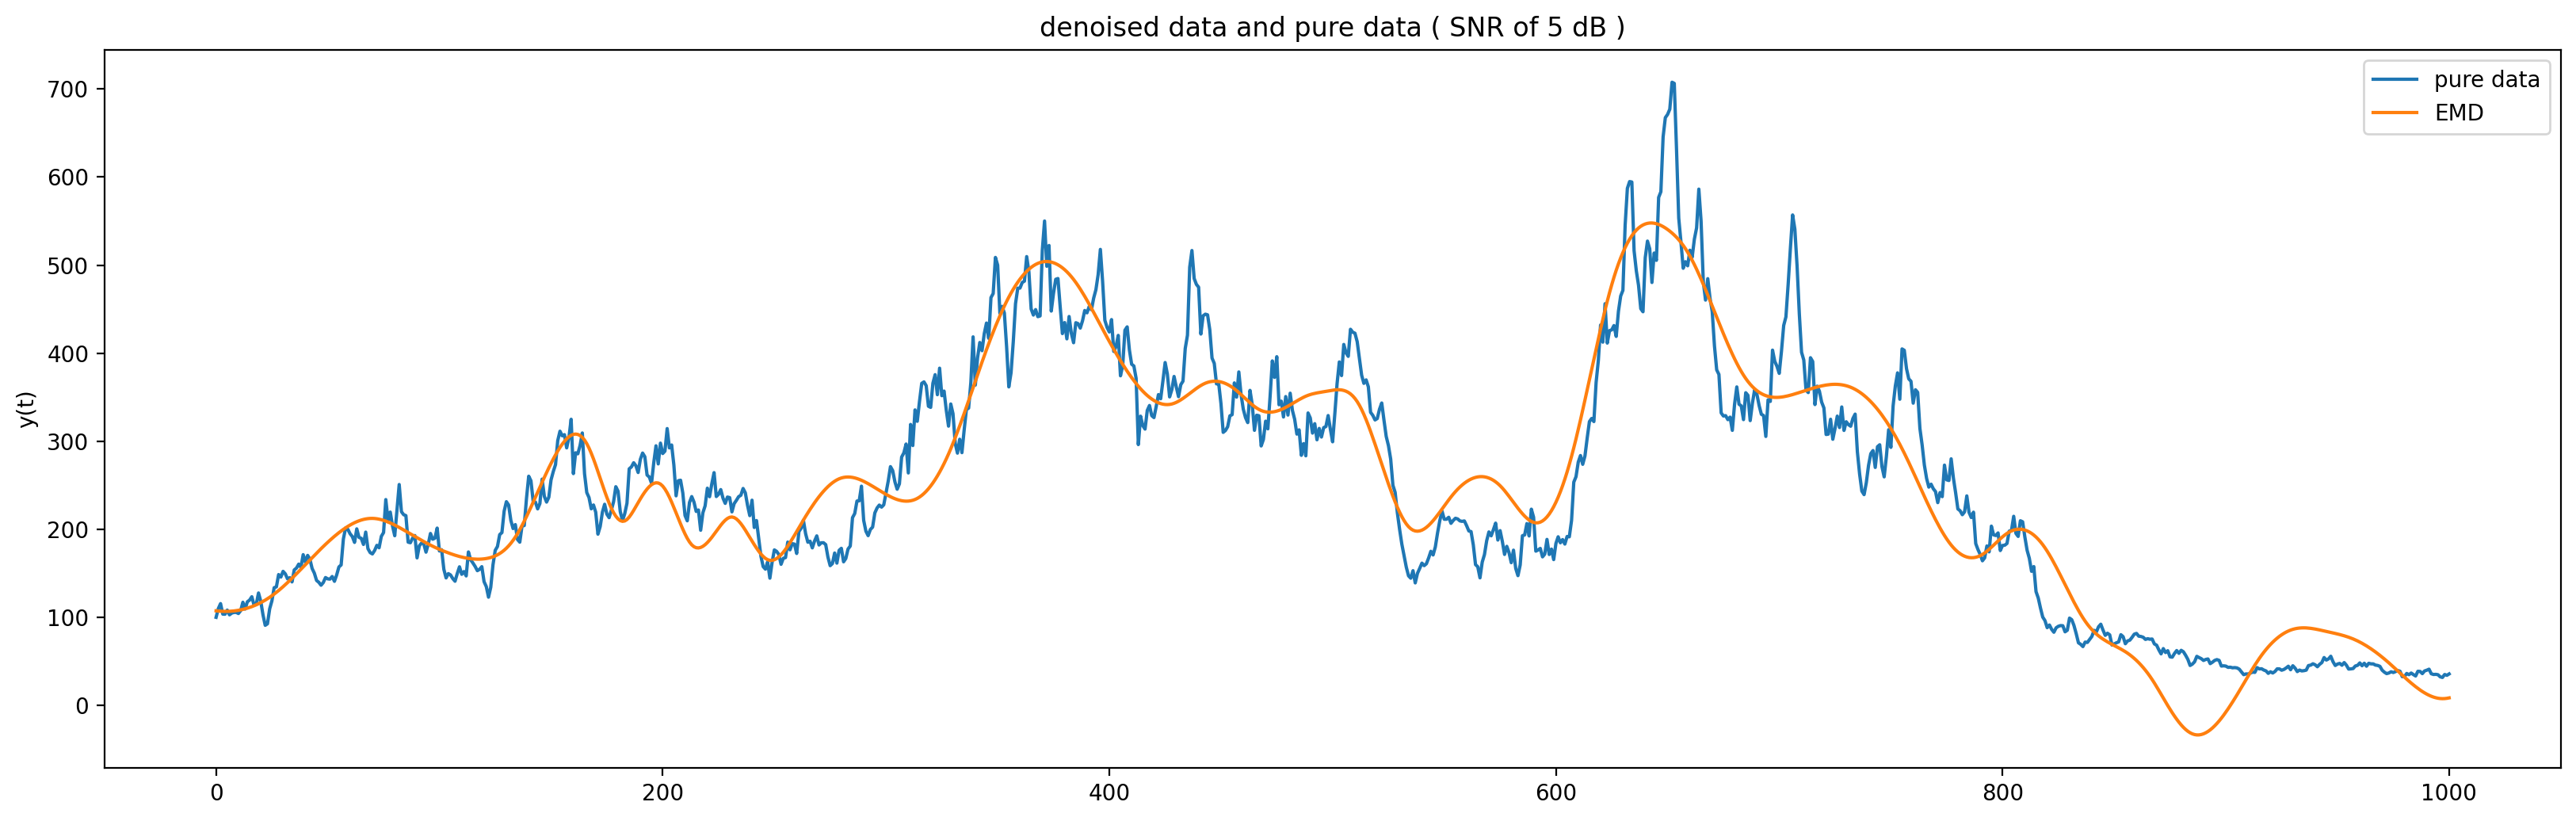

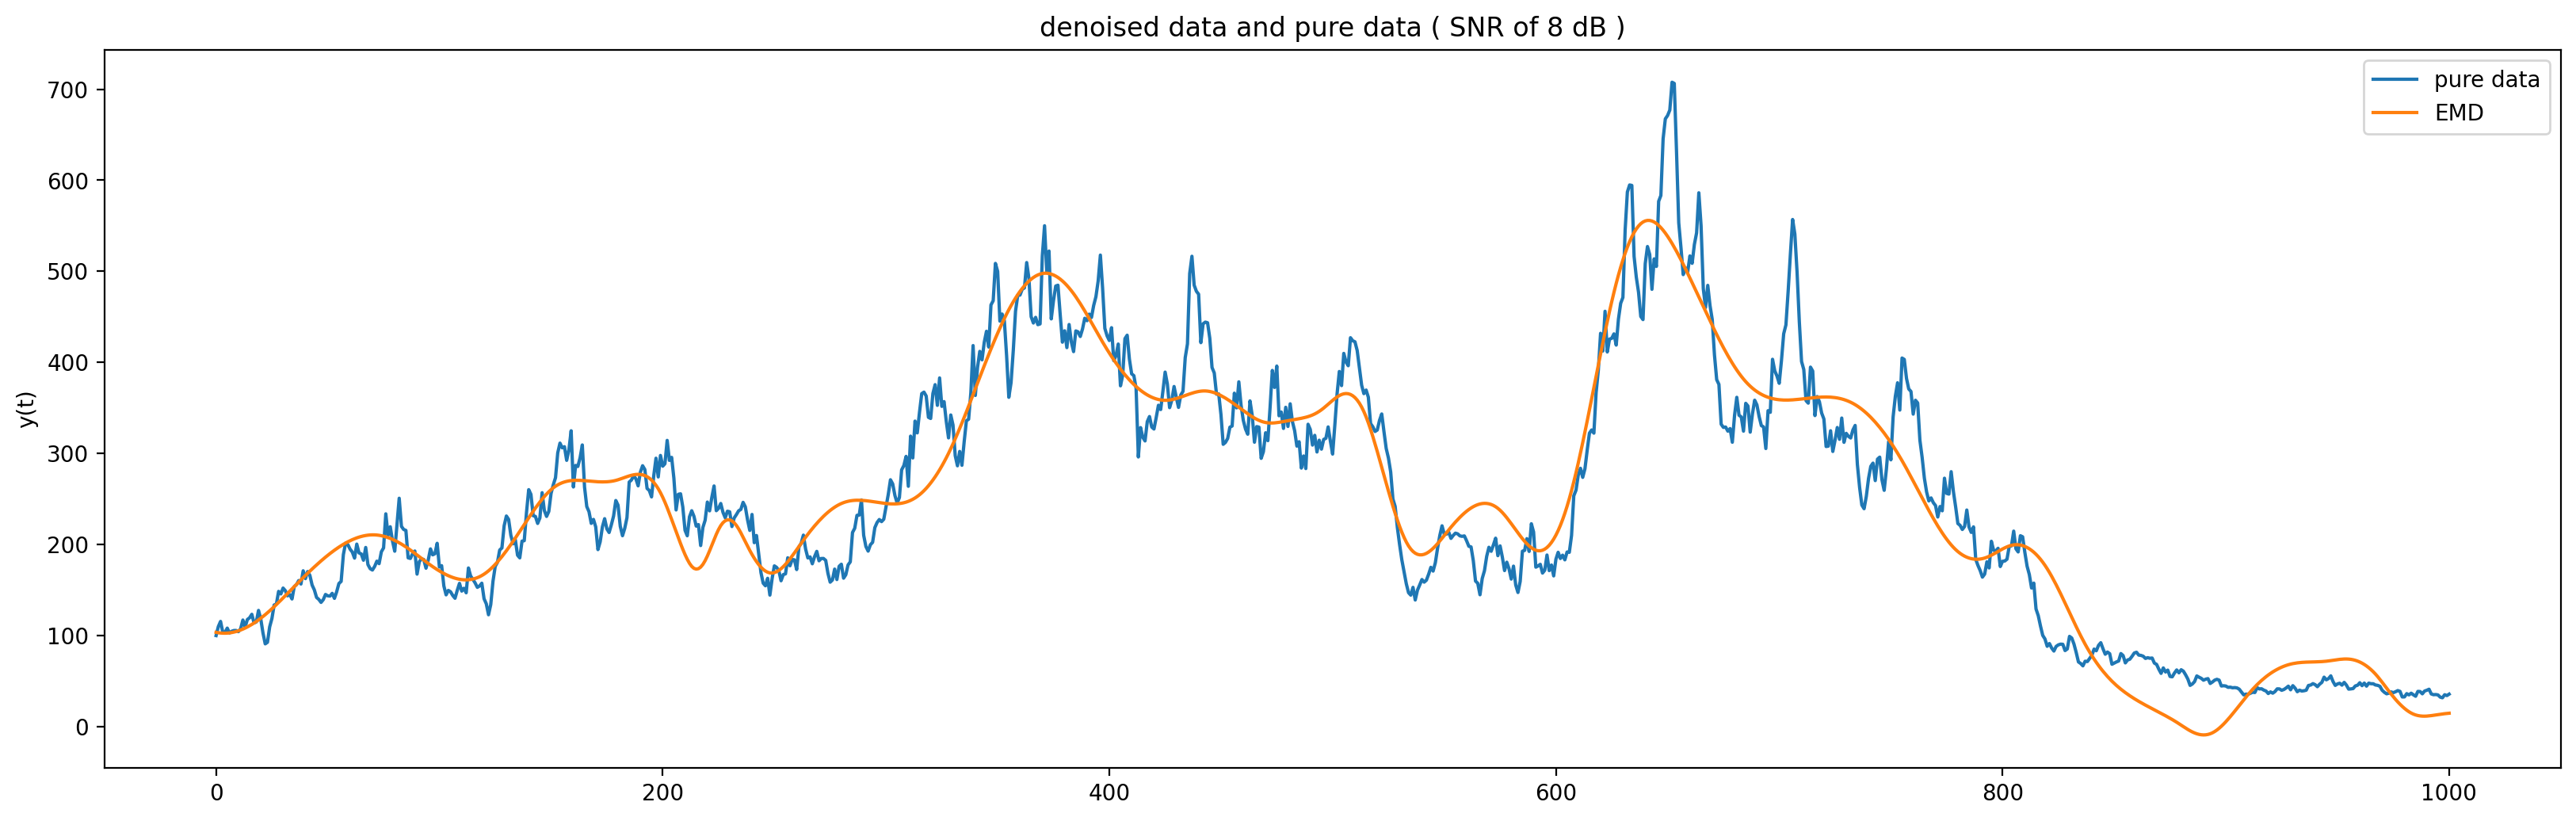

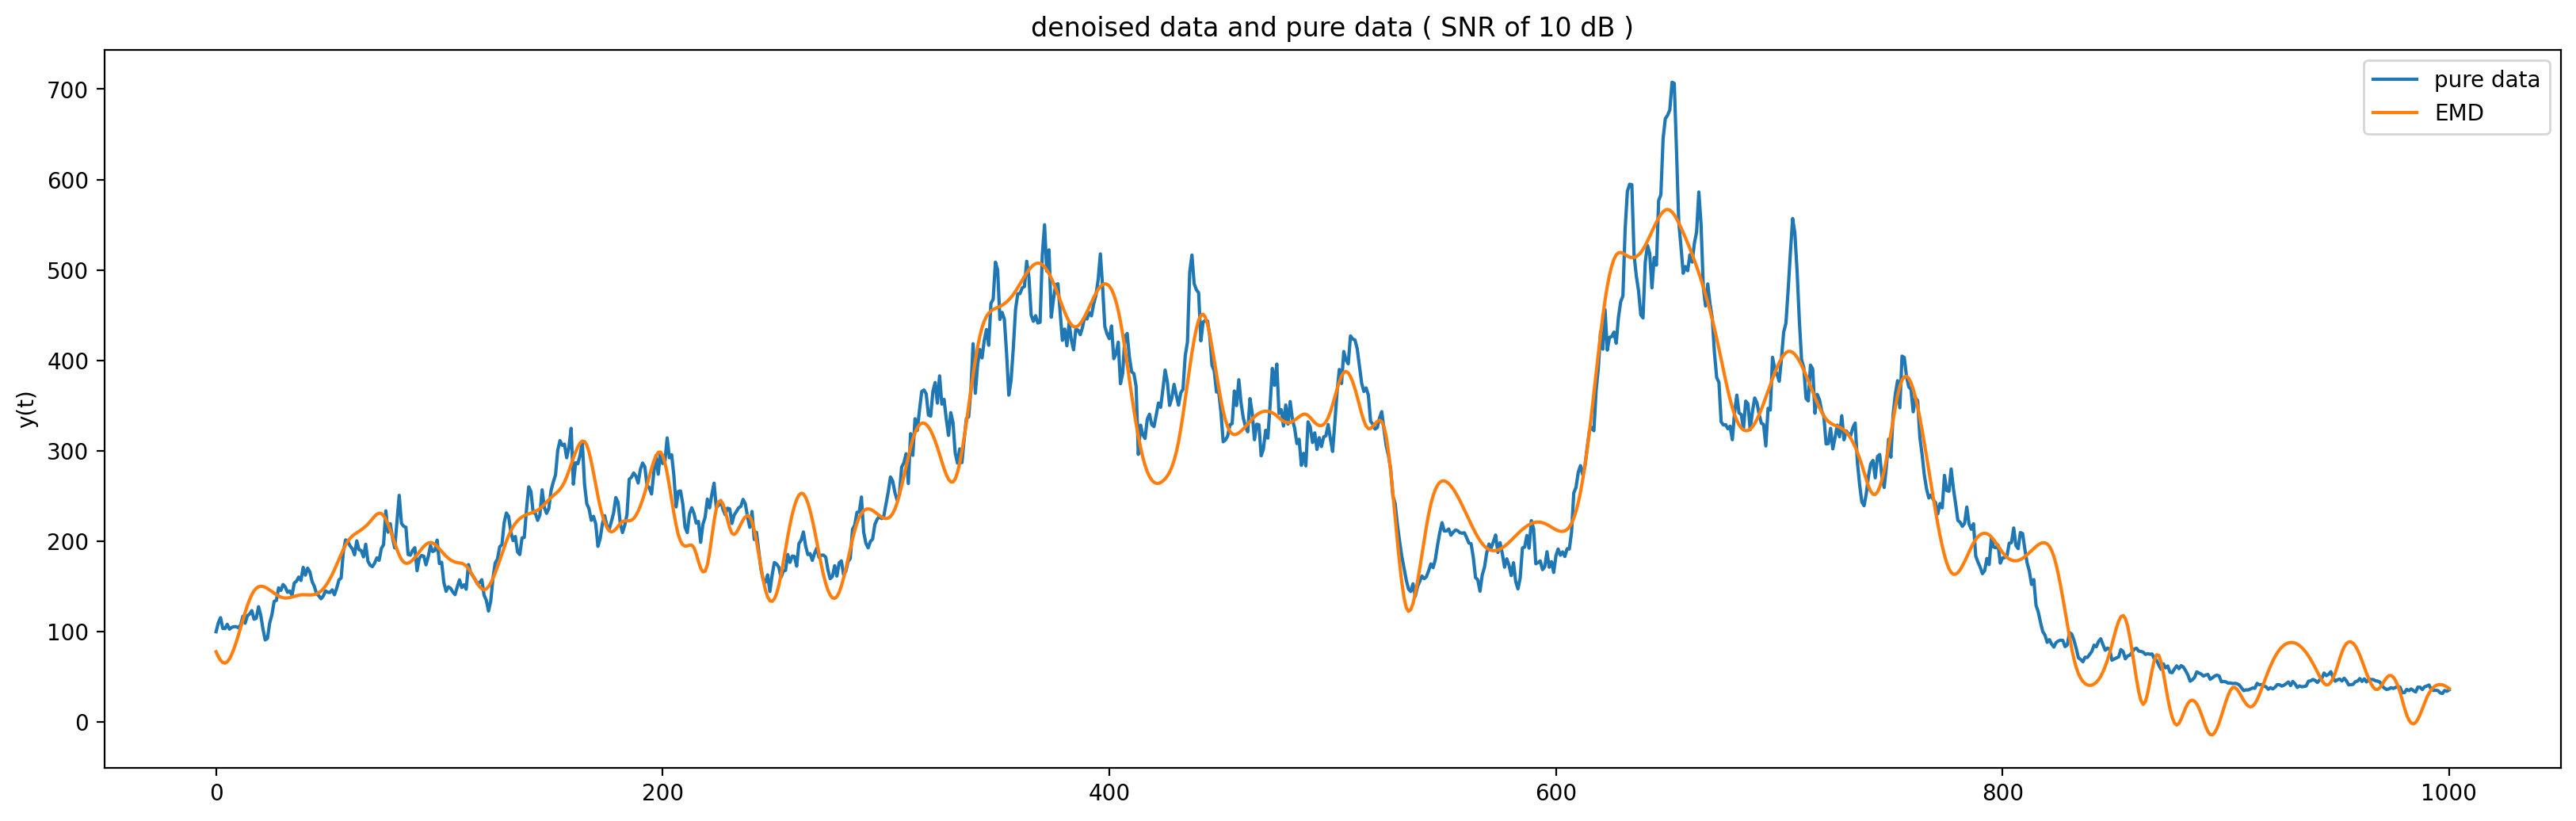

In [51]:
lst = [1,5,8,10]
real_snr = []
emd_snr_list = []
emd_rmse_list = []
emd_nsignal = []
emd_num = []
for i in lst:
    noisy = add_noise(y_t,i,show = False)
    nsiganl,n = emd_denoise(noisy,'emd')
    # plot
    plt.figure(figsize=(20,6),dpi=200)
    plt.title('denoised data and pure data ( SNR of '+str(i)+' dB )')
    plt.ylabel('y(t)')
    plt.plot(y_t,label = 'pure data')
    plt.plot(nsiganl,label = 'EMD')
    #plt.plot(noisy,label = 'noisy data')
    plt.legend()
    plt.savefig("./emd denosed"+str(i))
    plt.show()
    #store denosed data
    #print(type(nsiganl))
    emd_nsignal.append(nsiganl)
    emd_num.append(n)
    snr = calculate_snr(y_t,nsiganl)
    snr1 = calculate_snr(y_t,noisy)
    rmse = mean_squared_error(y_t, nsiganl, squared=False)
    emd_snr_list.append(snr)
    emd_rmse_list.append(rmse)
    real_snr.append(snr1)

In [14]:
real_snr

[0.9325579205589662, 4.932557920558974, 7.9325579205589705, 9.93255792055897]

In [15]:
emd_snr_list

[12.585419371237506, 15.391763542266826, 16.252991605080346, 17.56512552023066]

In [16]:
emd_rmse_list

[65.69653068967055, 47.55818011529003, 43.06890440107379, 37.03029129876693]

## ceemdan

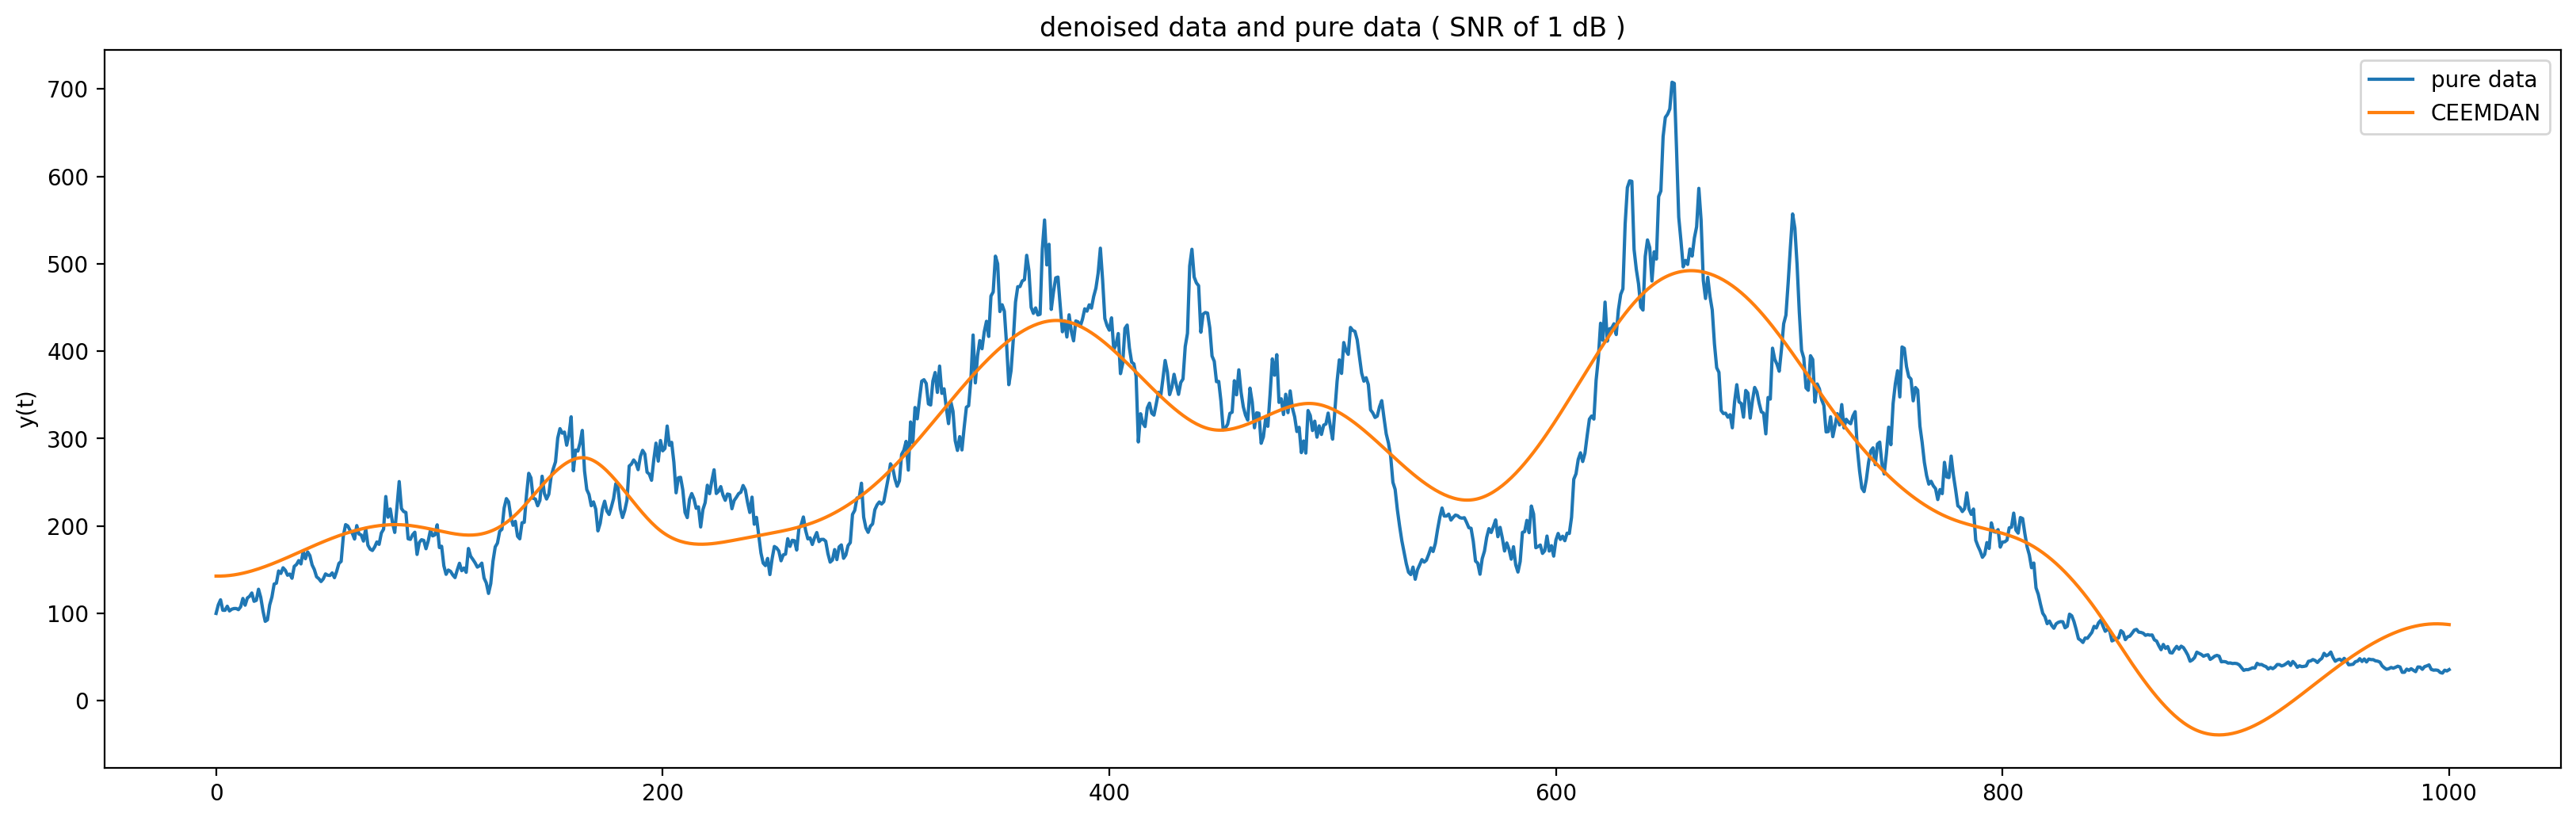

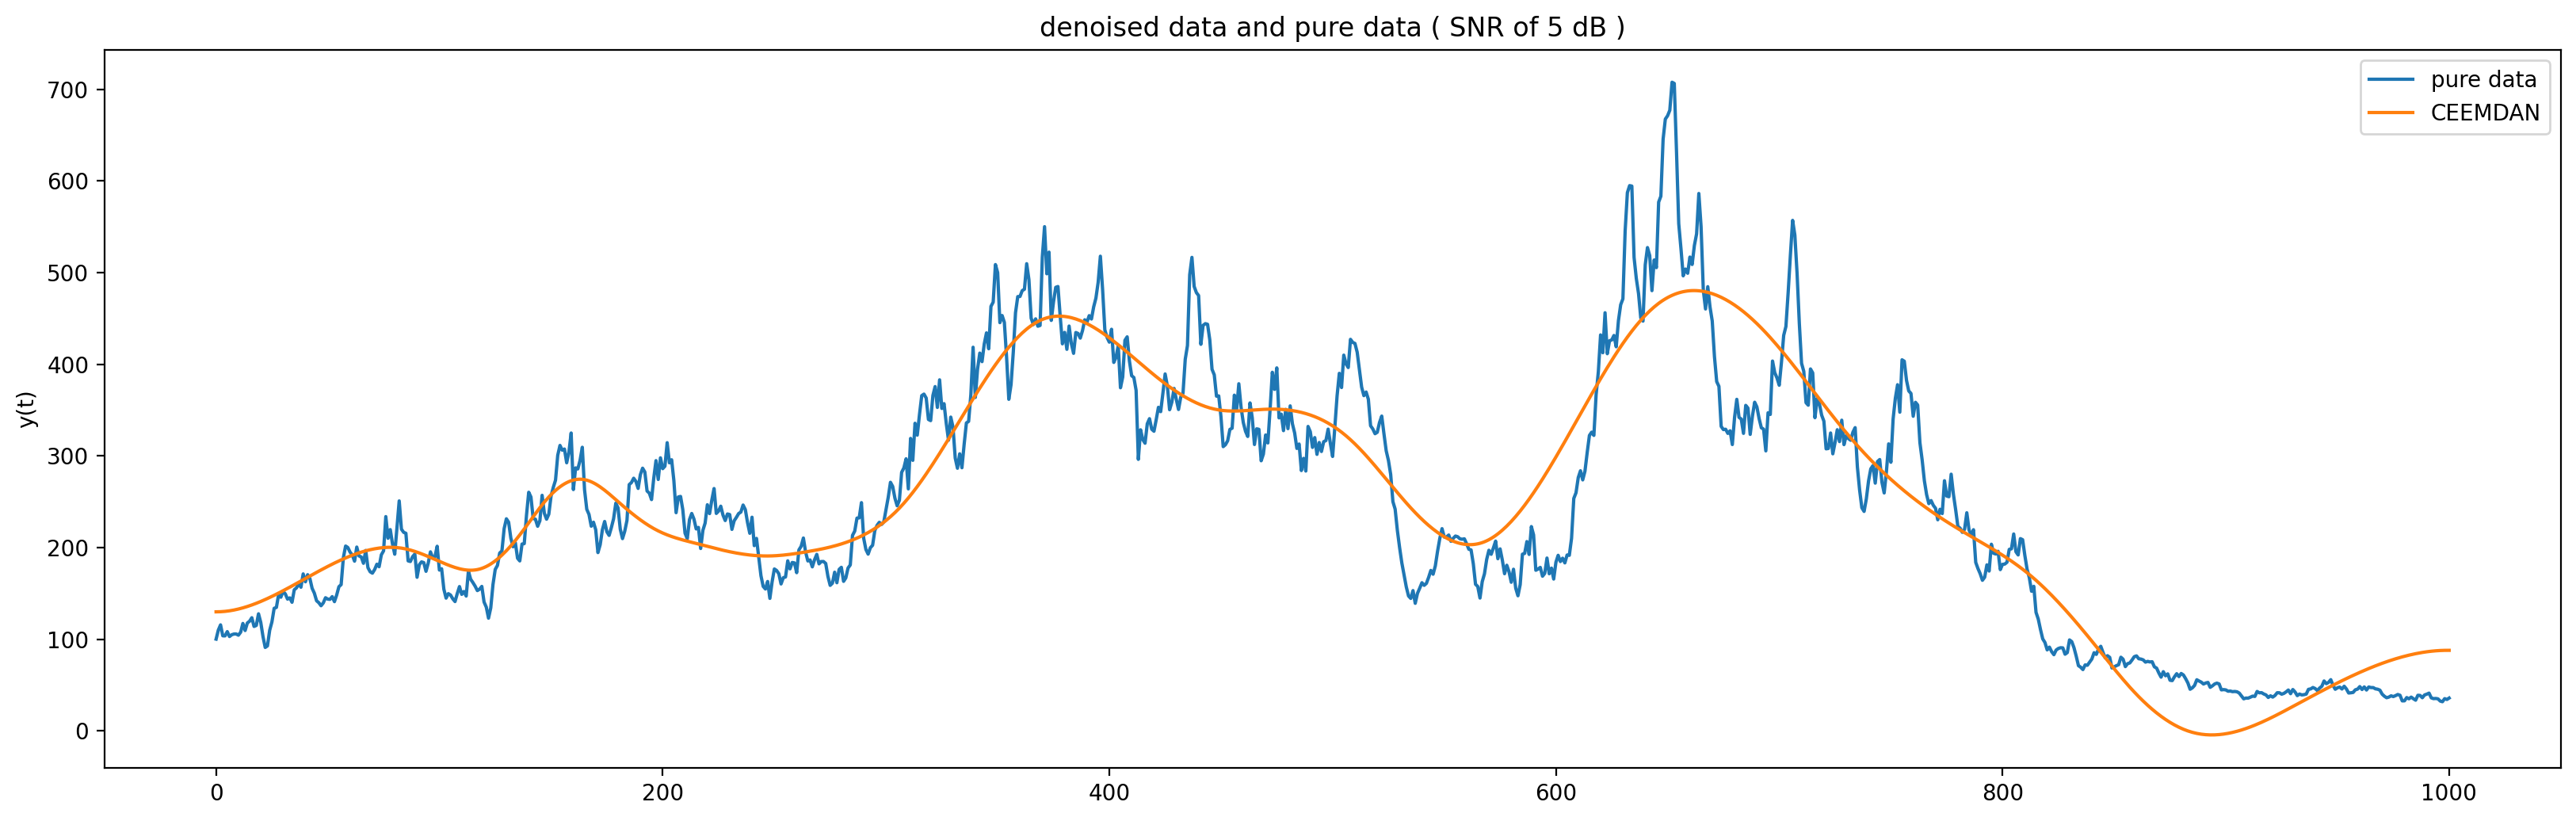

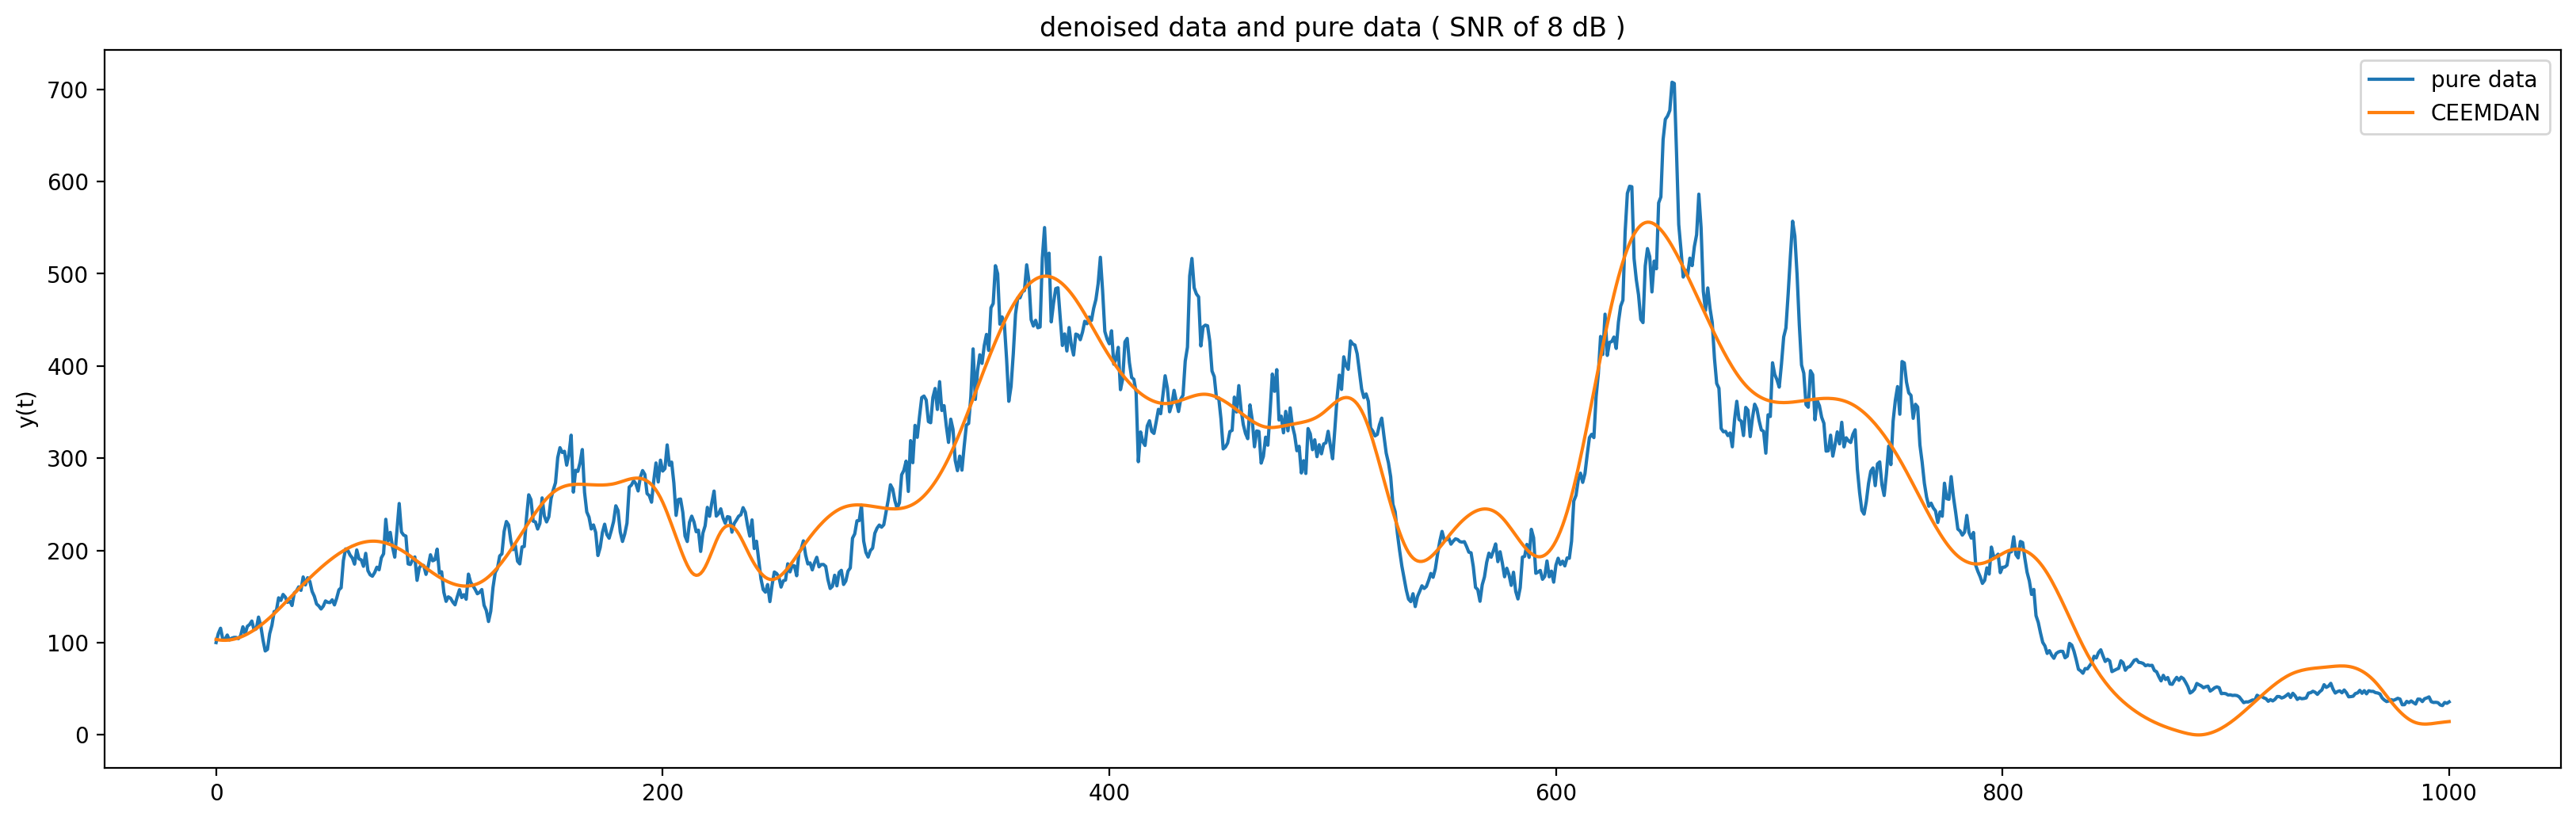

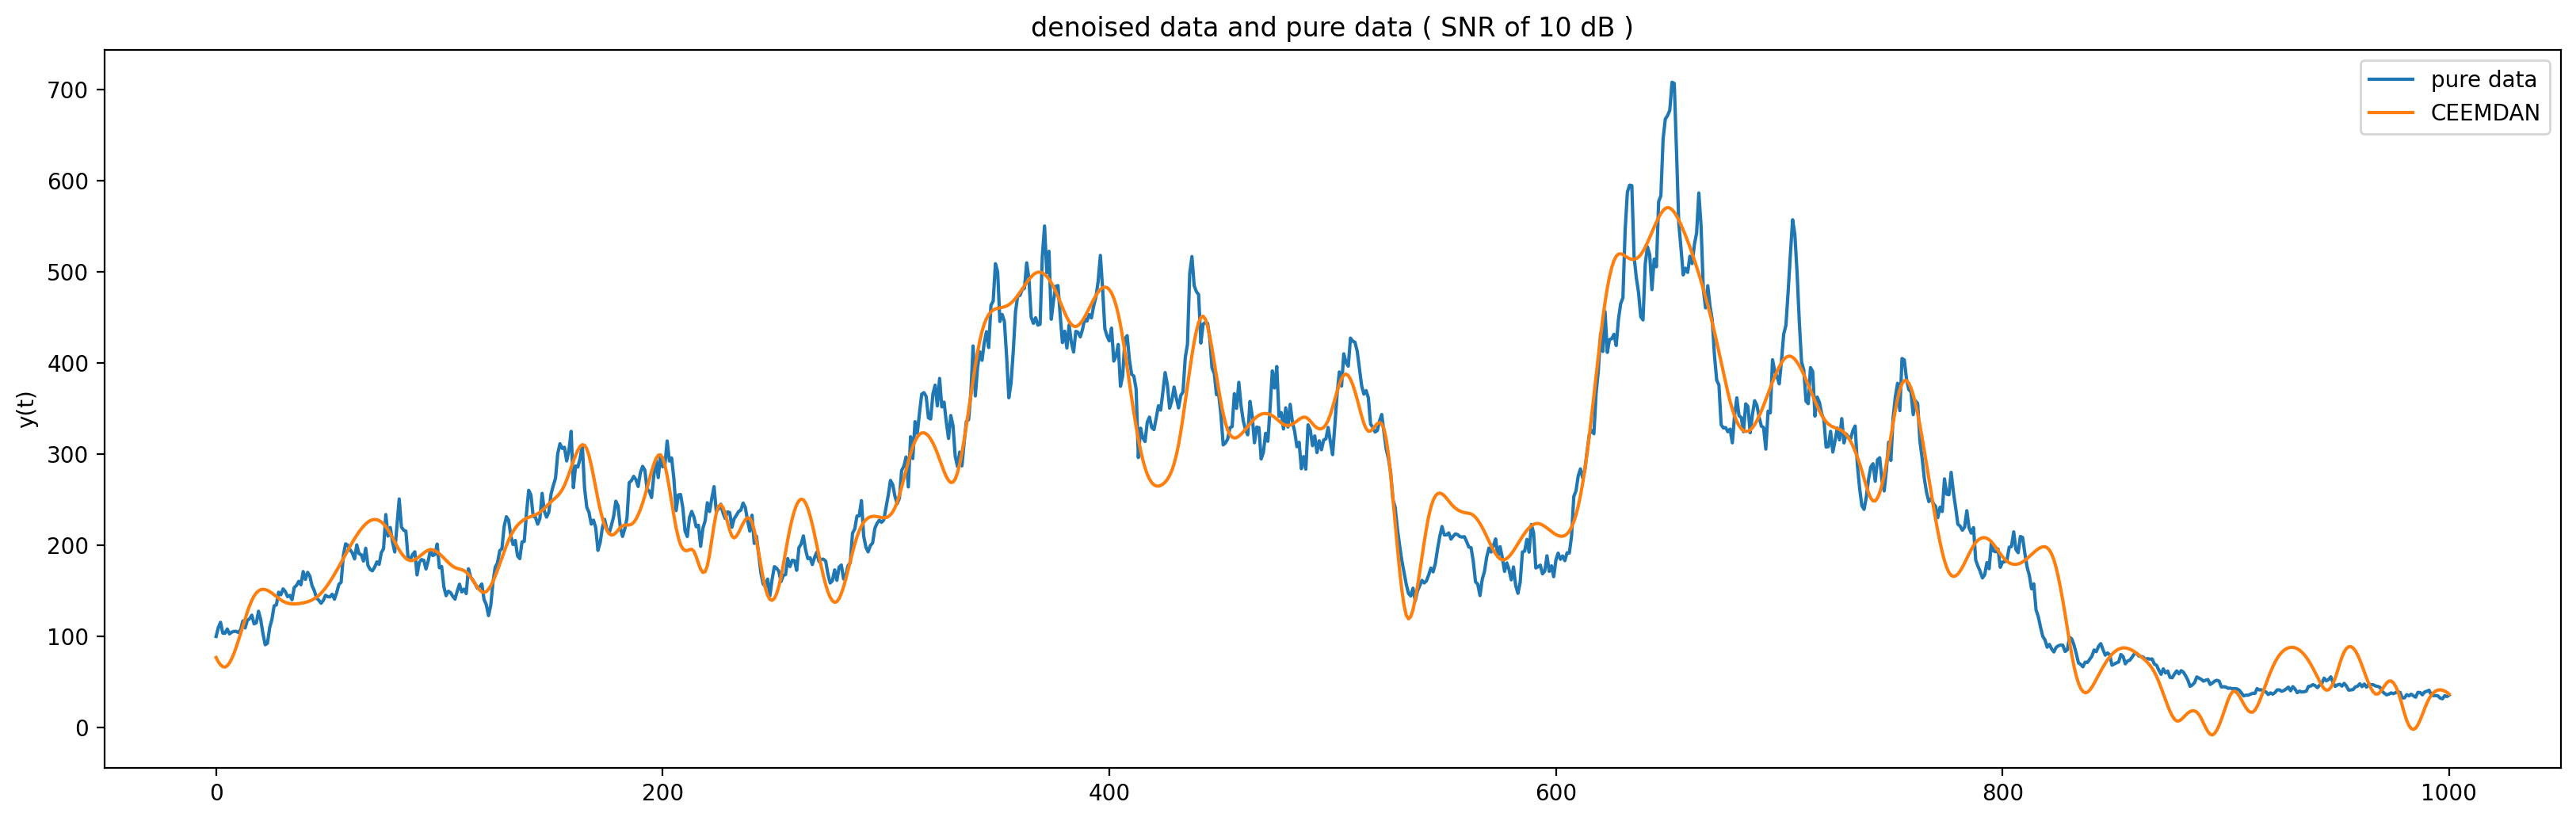

In [52]:
from sklearn.metrics import mean_squared_error
ceemdan_snr_list = []
ceemdan_rmse_list = []
ceemdan_nsignal = []
np.random.seed(10)

for i in lst:
    
    noisy = add_noise(y_t,i,show = False)
    nsiganl,n = emd_denoise(noisy,'ceemdan')
    
    # plot
    plt.figure(figsize=(20,6),dpi=200)
    plt.title('denoised data and pure data ( SNR of '+str(i)+' dB )')
    plt.ylabel('y(t)')
    plt.plot(y_t,label = 'pure data')
    plt.plot(nsiganl,label = 'CEEMDAN')
    #plt.plot(noisy,label = 'noisy data')
    plt.legend()
    plt.savefig("./ceemdan denosed "+str(i))
    plt.show()

    ceemdan_nsignal.append(nsiganl)
    snr = calculate_snr(y_t,nsiganl)
    rmse = mean_squared_error(y_t, nsiganl, squared=False)
    ceemdan_snr_list.append(snr)
    ceemdan_rmse_list.append(rmse)

In [53]:
ceemdan_snr_list

[13.549274786094543, 14.75106456065948, 16.259653185505933, 17.728559267197003]

In [54]:
ceemdan_rmse_list

[58.796255050648114, 51.198846488500244, 43.035885678759215, 36.34004335419331]

## VMD + DFA

In [55]:
# VMD # There are some problems in this module
# -------------------------------
def vmd_decom(series,K,draw = False):
    from vmdpy import VMD  
    # VMD parameters
    alpha = 2000       # moderate bandwidth constraint  
    tau = 0.           # noise-tolerance (no strict fidelity enforcement)  
    DC = 0             # no DC part imposed  
    init = 1           # initialize omegas uniformly  
    tol = 1e-7         

    # VMD 
    imfs_vmd, imfs_hat, omega = VMD(series, alpha, tau, K, DC, init, tol)  
    imfs_num = np.shape(imfs_vmd)[0]
    
    if draw:
        # Plot original data
        fig = plt.figure(figsize=(16,2*imfs_num))
        plt.subplot(1+imfs_num, 1, 1 )
        plt.plot(series, color='#0070C0') #F27F19 orange #0070C0 blue
        plt.ylabel('VMD Original data')
    
        # Plot IMFs
        for i in range(imfs_num):
            plt.subplot(1 + imfs_num,1,2 + i)
            plt.plot(imfs_vmd[i, :], color='#F27F19')
            plt.ylabel('VMD-IMF'+str(i))
            
        plt.show()
    
    # Save data
    imfs_df = pd.DataFrame(imfs_vmd.T)
    imfs_df.columns = ['imf'+str(i) for i in range(imfs_num)]

    return imfs_df # pd.DataFrame

In [56]:
import fathon
from fathon import fathonUtils as fu

In [57]:
def calculate_H(array):
    a = fu.toAggregated(array)
    pydfa = fathon.DFA(a)
    wins = fu.linRangeByStep(4,16)
    n,F = pydfa.computeFlucVec(wins)
    H,H_intercept = pydfa.fitFlucVec()
    return H

In [58]:
def plot_dfa(H_list):
    plt.plot(H_list)
    plt.axhline(0.75,color = 'red')
    plt.xlabel('IMF')
    plt.show()

In [59]:
def J_number(num):
    if num <= 0.75:
        J = 1
    elif num> 0.75 and num <= 1.0:
        J = 2
    elif num > 1 and num <= 1.5:
        J = 3
    else:
        J = 4
    return J

In [60]:
def K_num(series,J):
    K = 1
    num = 0
    while (num < 20):
        num = 0
        vmf_imfs = vmd_decom(series,K,draw=False)
        for i in vmf_imfs.columns:
            if calculate_H(vmf_imfs[i]) >= 0.75:
                num = num +1
        if num > J:
                return K-1
        K = K + 1
    #the Max K
    #K = K -1
    #return K

In [61]:
def denoise_vmd(series,K,J):
    
    imfs = vmd_decom(series,K)
    recon_data = imfs.iloc[:,:J].sum(axis = 1)
    if len(series) > len(recon_data):
        recon_data = list(recon_data)
        recon_data.insert(0,recon_data[0])
        
    return np.array(recon_data)

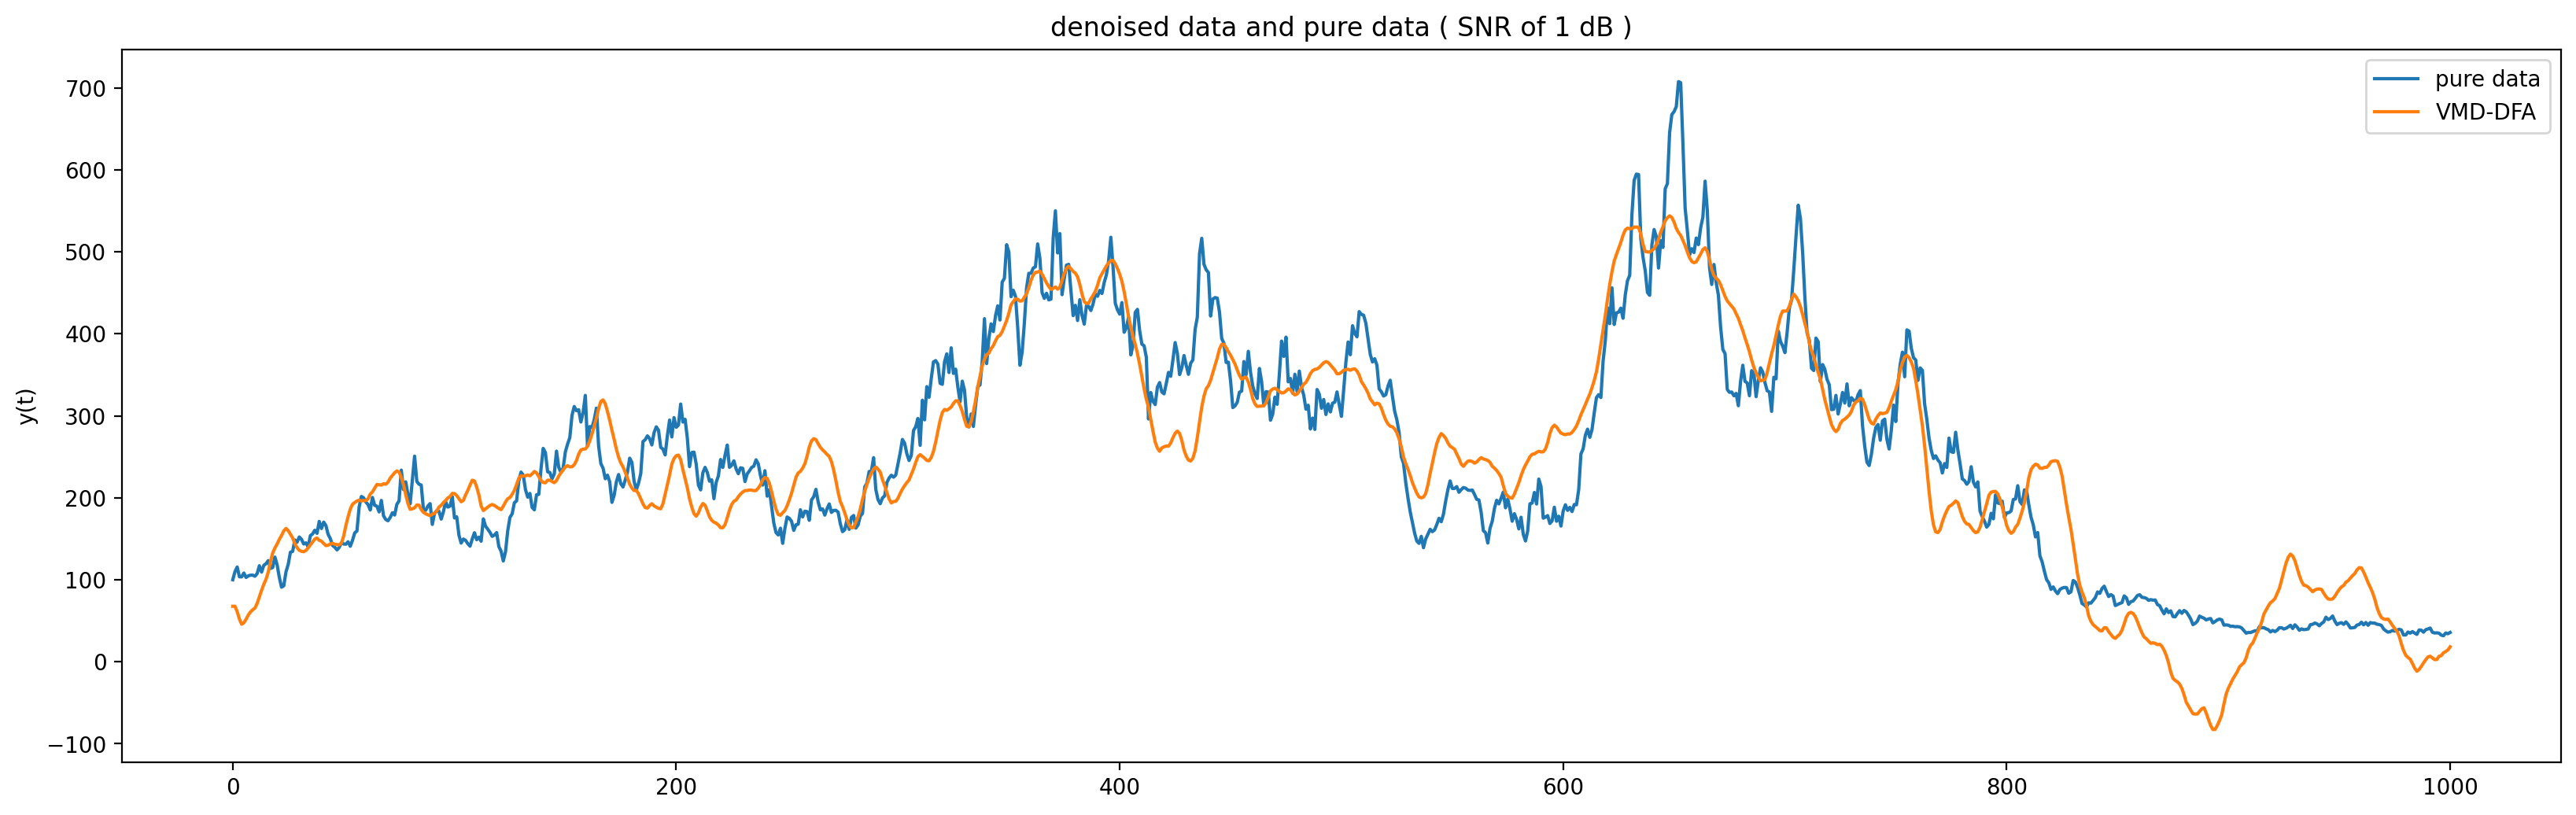

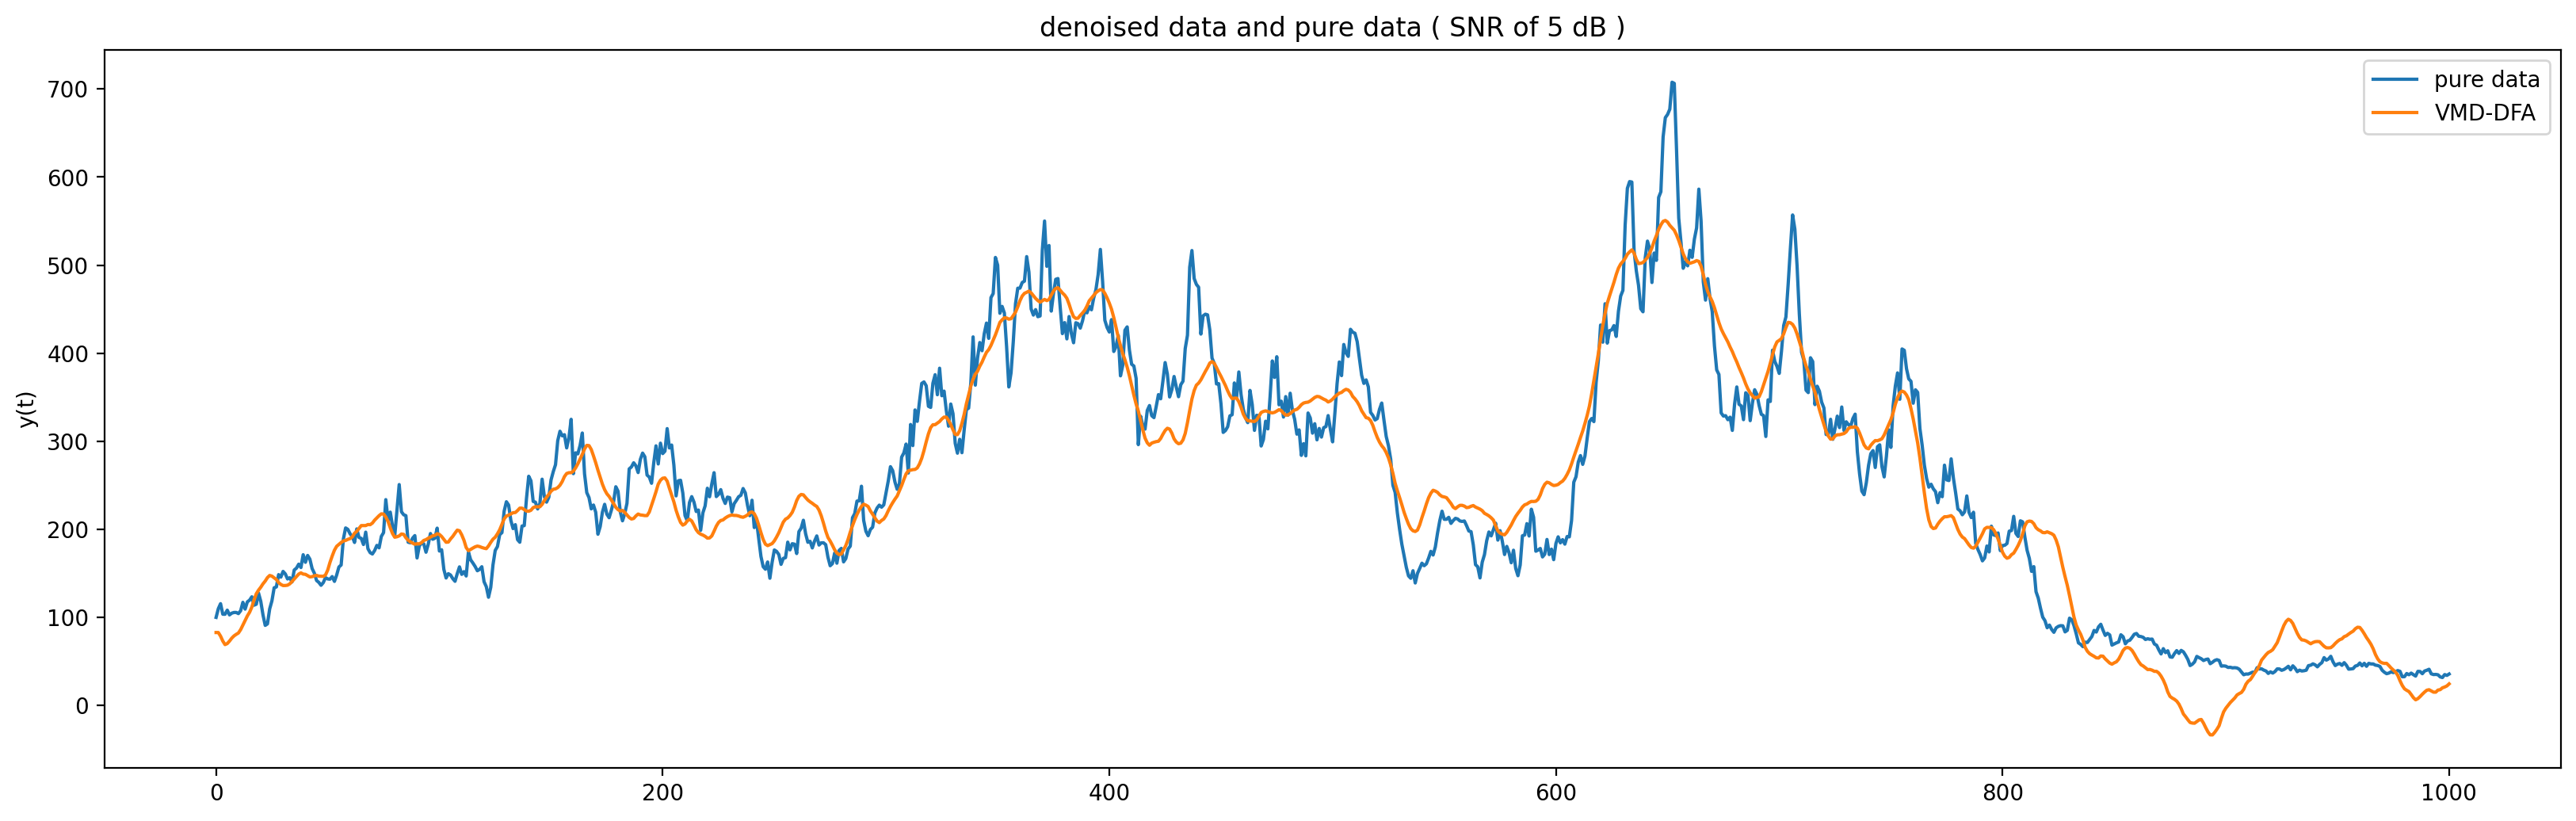

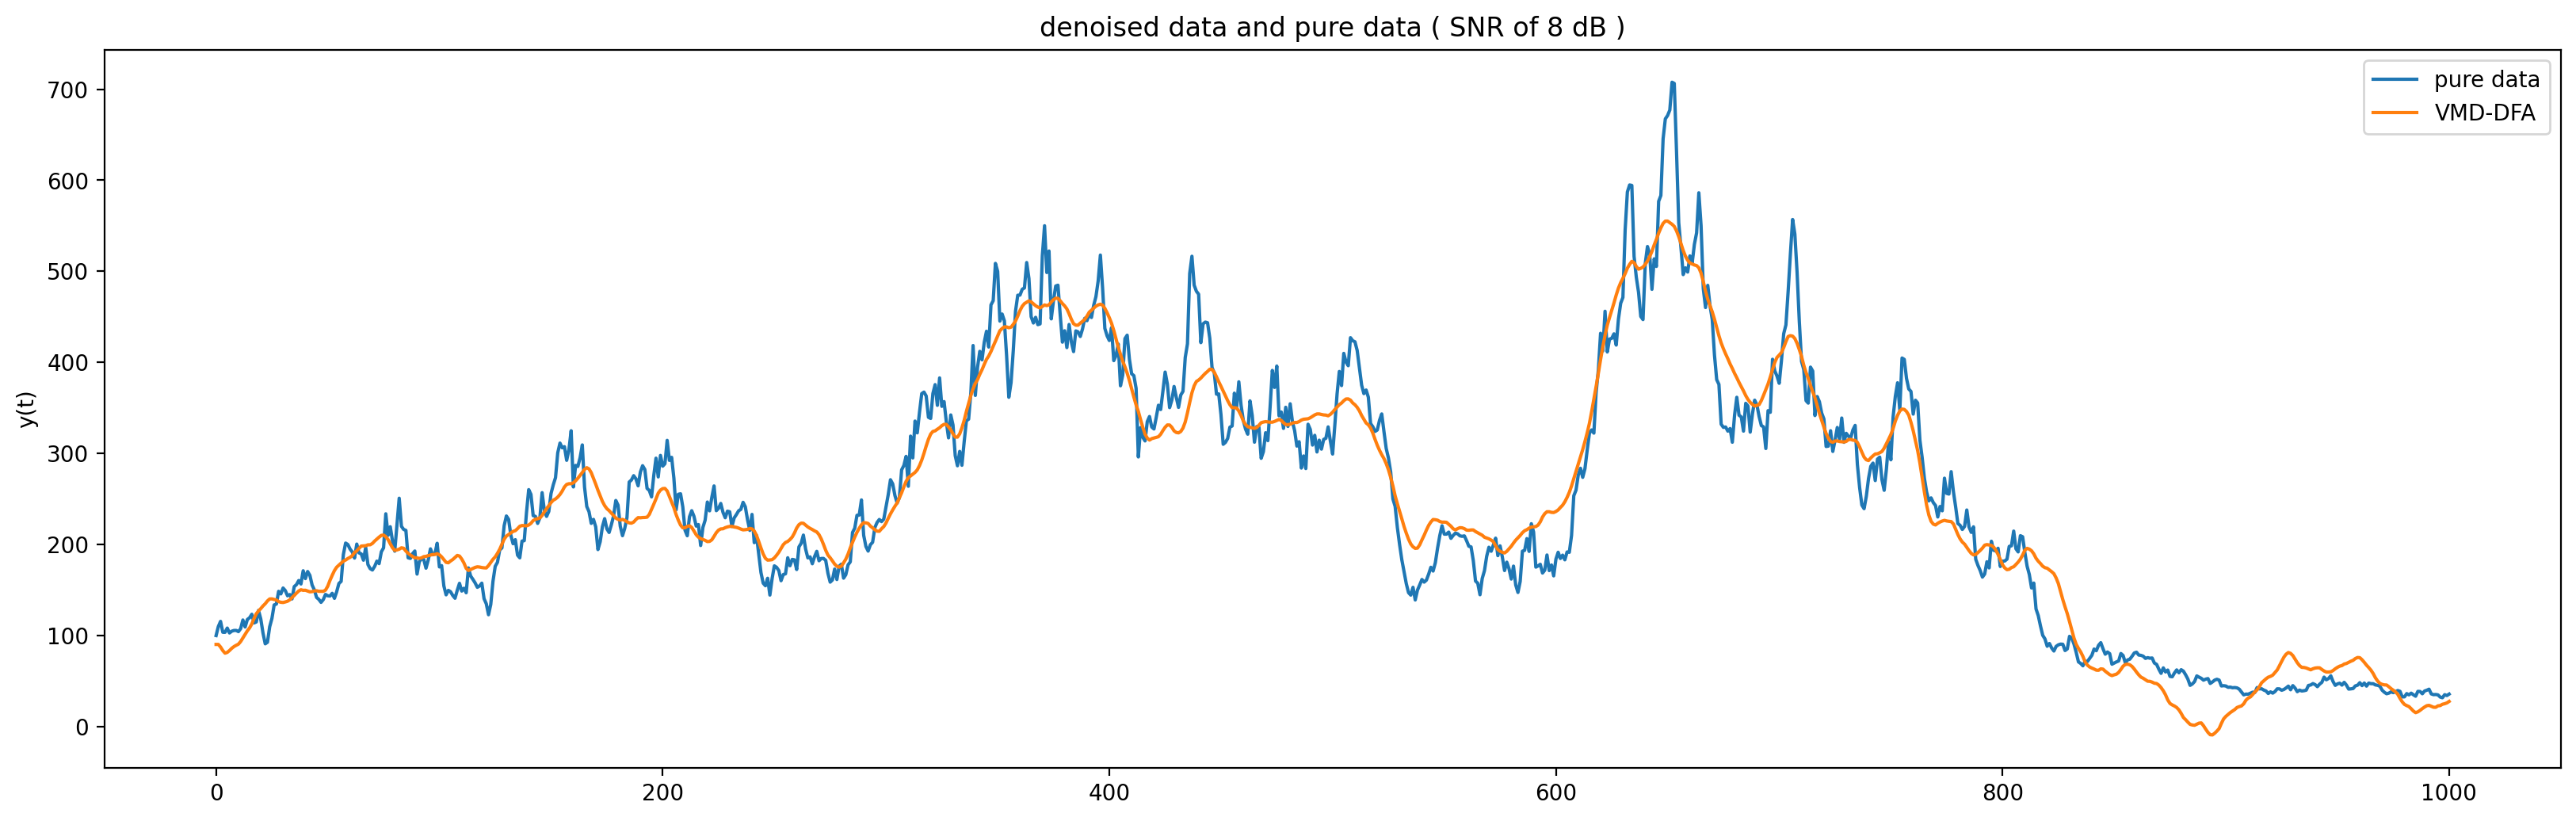

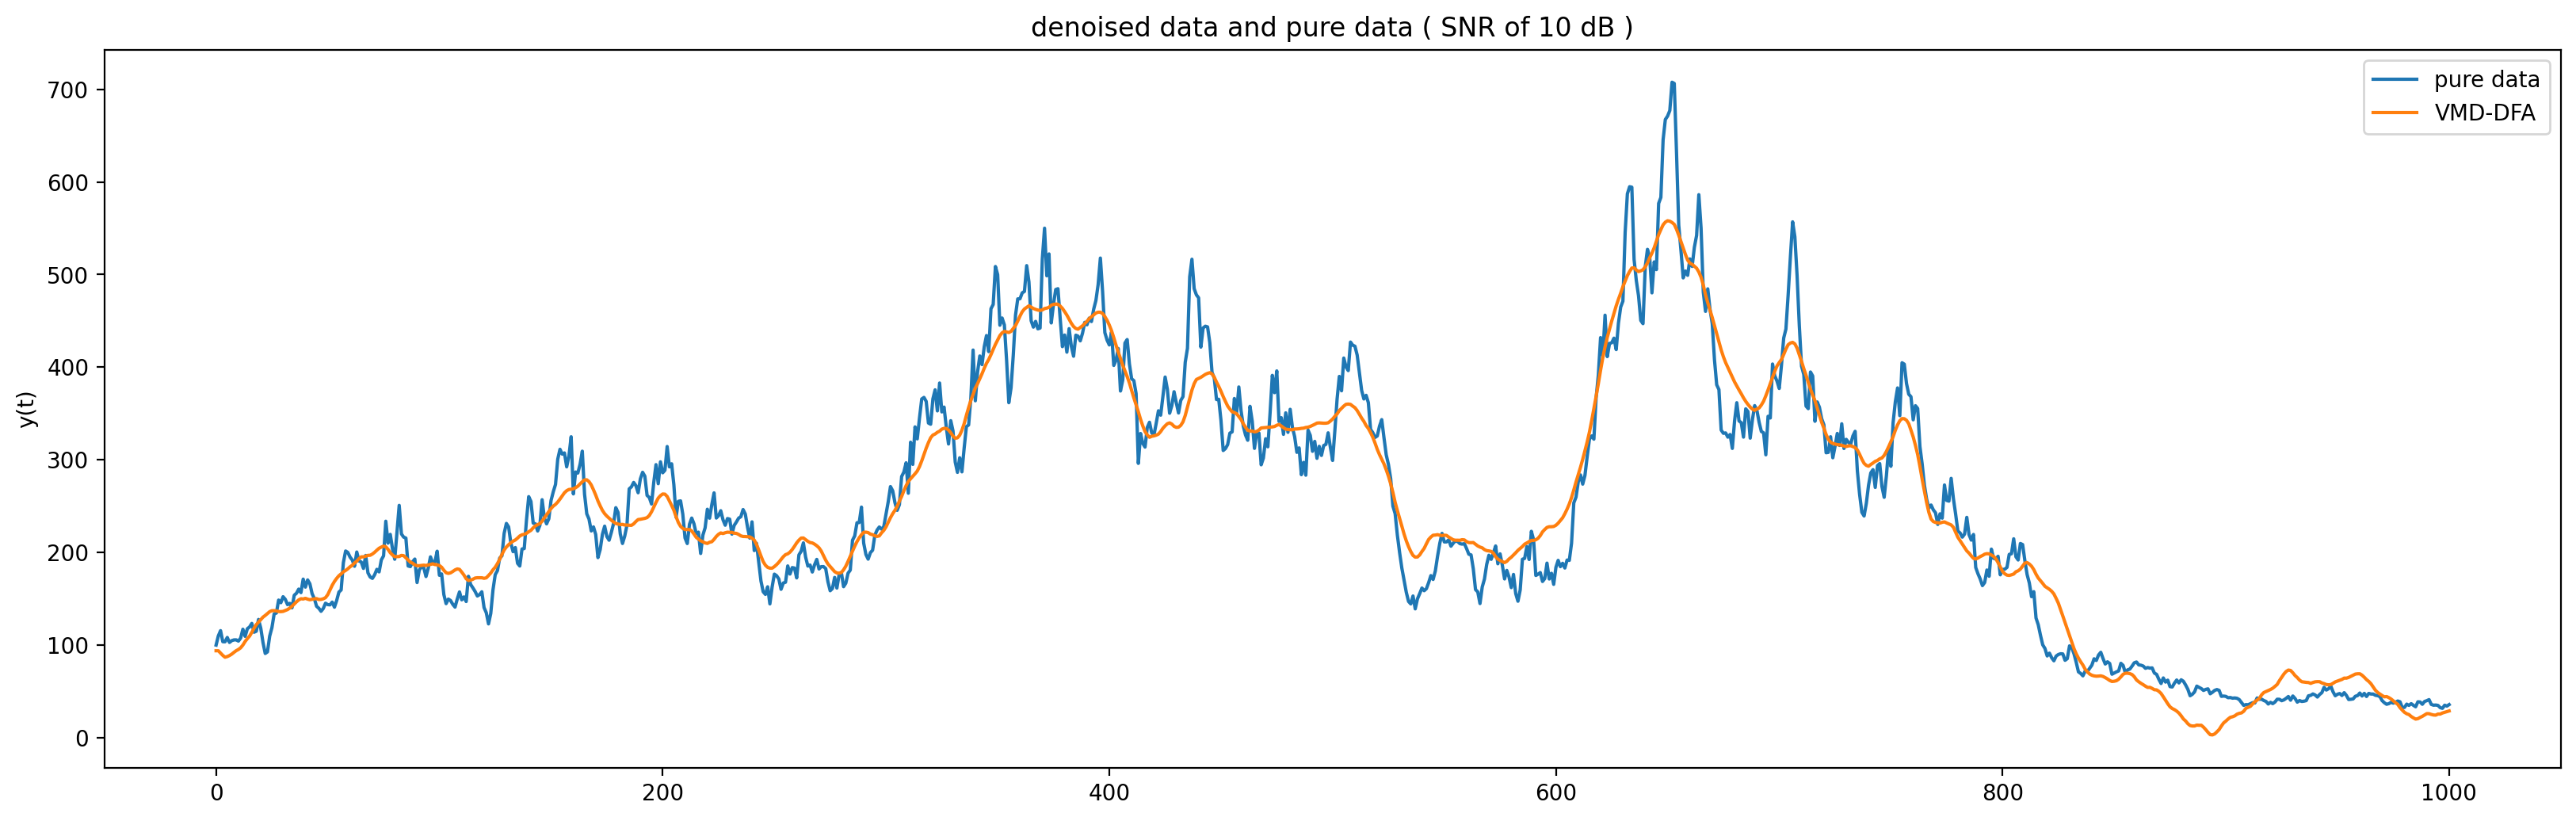

In [63]:
from sklearn.metrics import mean_squared_error
vmd_snr_list = []
vmd_rmse_list = []
vmd_nsignal = []
for i in lst:
    noisy = add_noise(y_t,i,show = False)
    alpha0 = calculate_H(noisy)
    J = J_number(alpha0)
    K = K_num(noisy,J)
    #print(J,K)
    nsiganl = denoise_vmd(noisy,K,J)
    vmd_nsignal.append(nsiganl)
    
    
    # plot
    plt.figure(figsize=(20,6),dpi=200)
    plt.title('denoised data and pure data ( SNR of '+str(i)+' dB )')
    plt.ylabel('y(t)')
    plt.plot(y_t,label = 'pure data')
    plt.plot(nsiganl,label = 'VMD-DFA')
    #plt.plot(noisy,label = 'noisy data')
    plt.legend()
    plt.savefig("./vmd denosed "+str(i))
    plt.show()

    snr = calculate_snr(y_t,nsiganl)
    rmse = mean_squared_error(y_t, nsiganl, squared=False)
    vmd_snr_list.append(snr)
    vmd_rmse_list.append(rmse)

In [64]:
vmd_snr_list

[14.106427828793148, 16.79949707431217, 18.246976824268714, 18.92957208180524]

In [65]:
vmd_rmse_list

[55.143206105621466, 40.44255182917675, 34.23454524127085, 31.647164199136093]

# VMD-EMD-DFA

In [66]:
def denoise_vmd_emd(series,K):
    imfs = vmd_decom(series,K)
    no = 0
    col_num = []
    for i in imfs.columns :
        if calculate_H(imfs[i]) >= 0.75:
            col_num.append(no)
        no = no+1
    
    recon_data = imfs.iloc[:,col_num].sum(axis = 1)
    if len(series) > len(recon_data):
        recon_data = list(recon_data)
        recon_data.insert(0,recon_data[0])
        
    return np.array(recon_data)

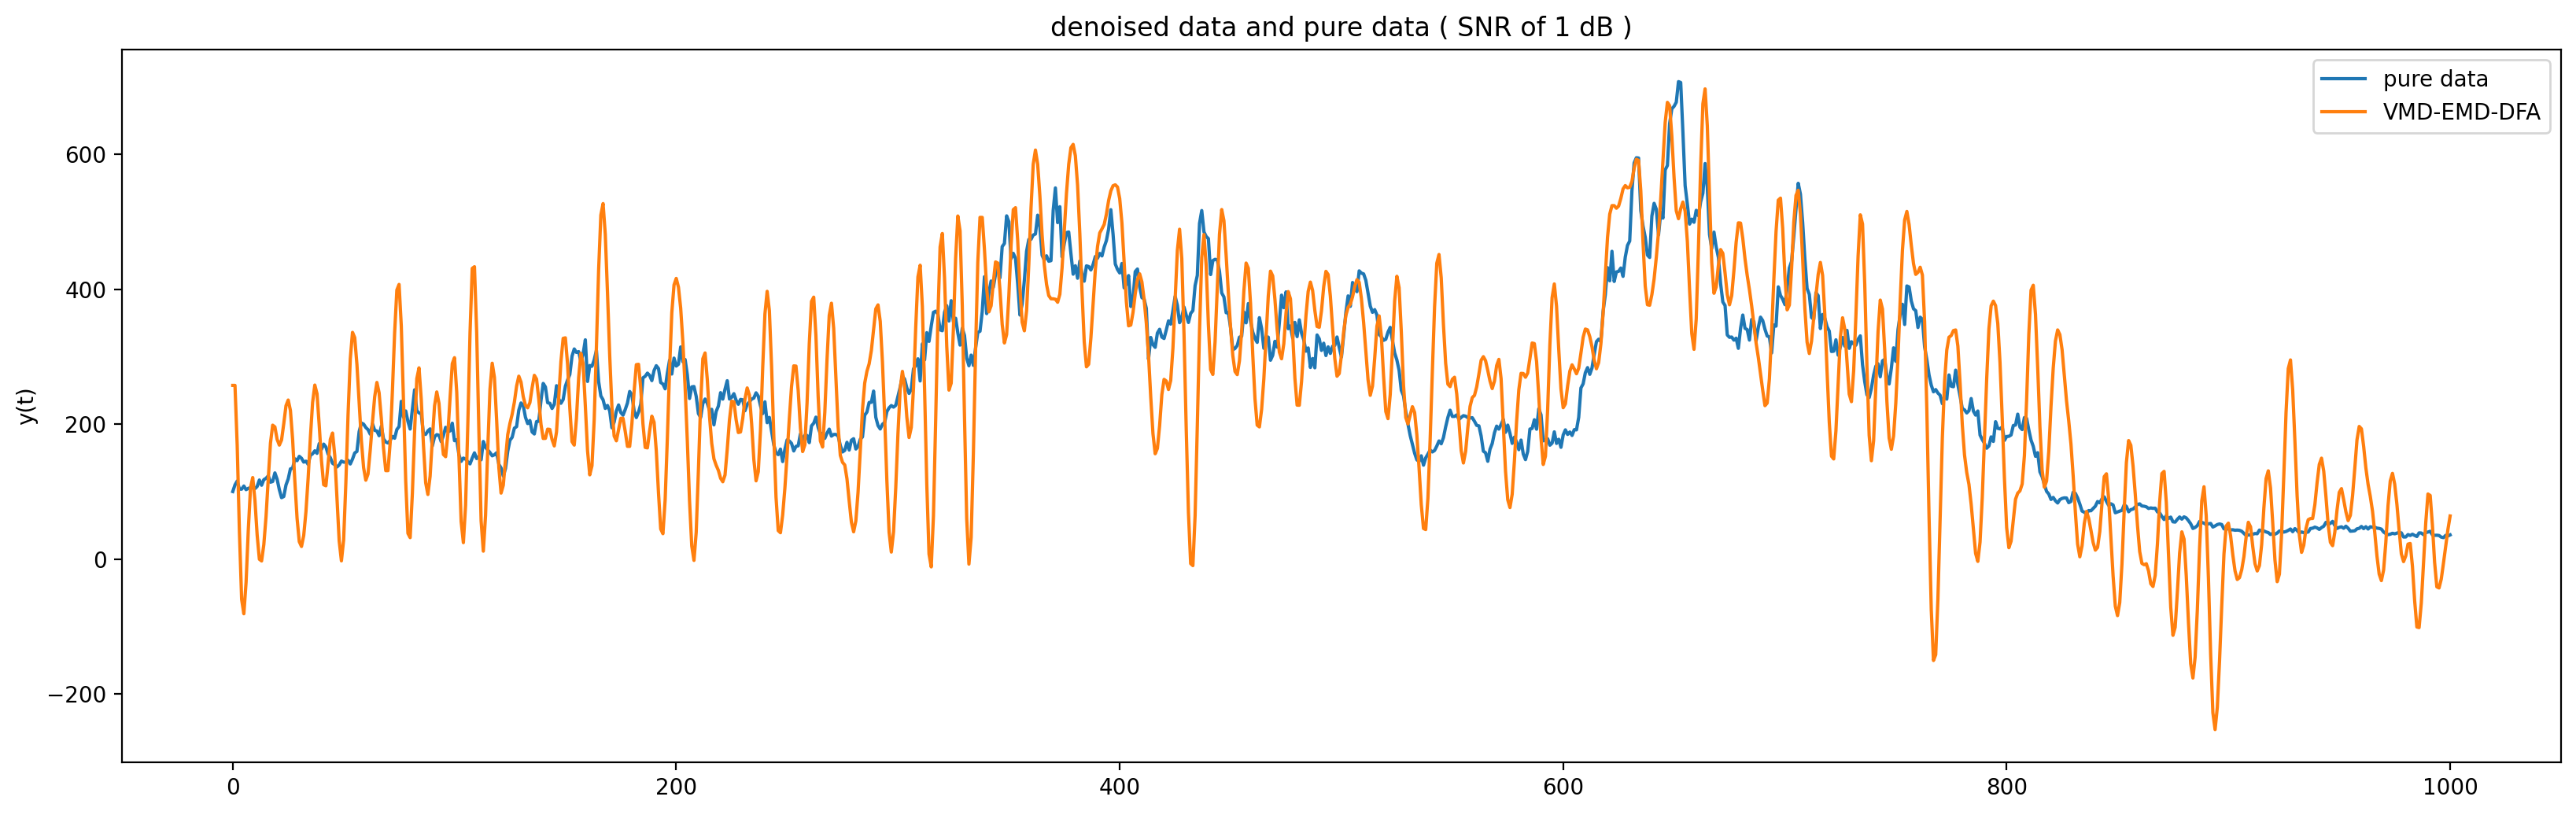

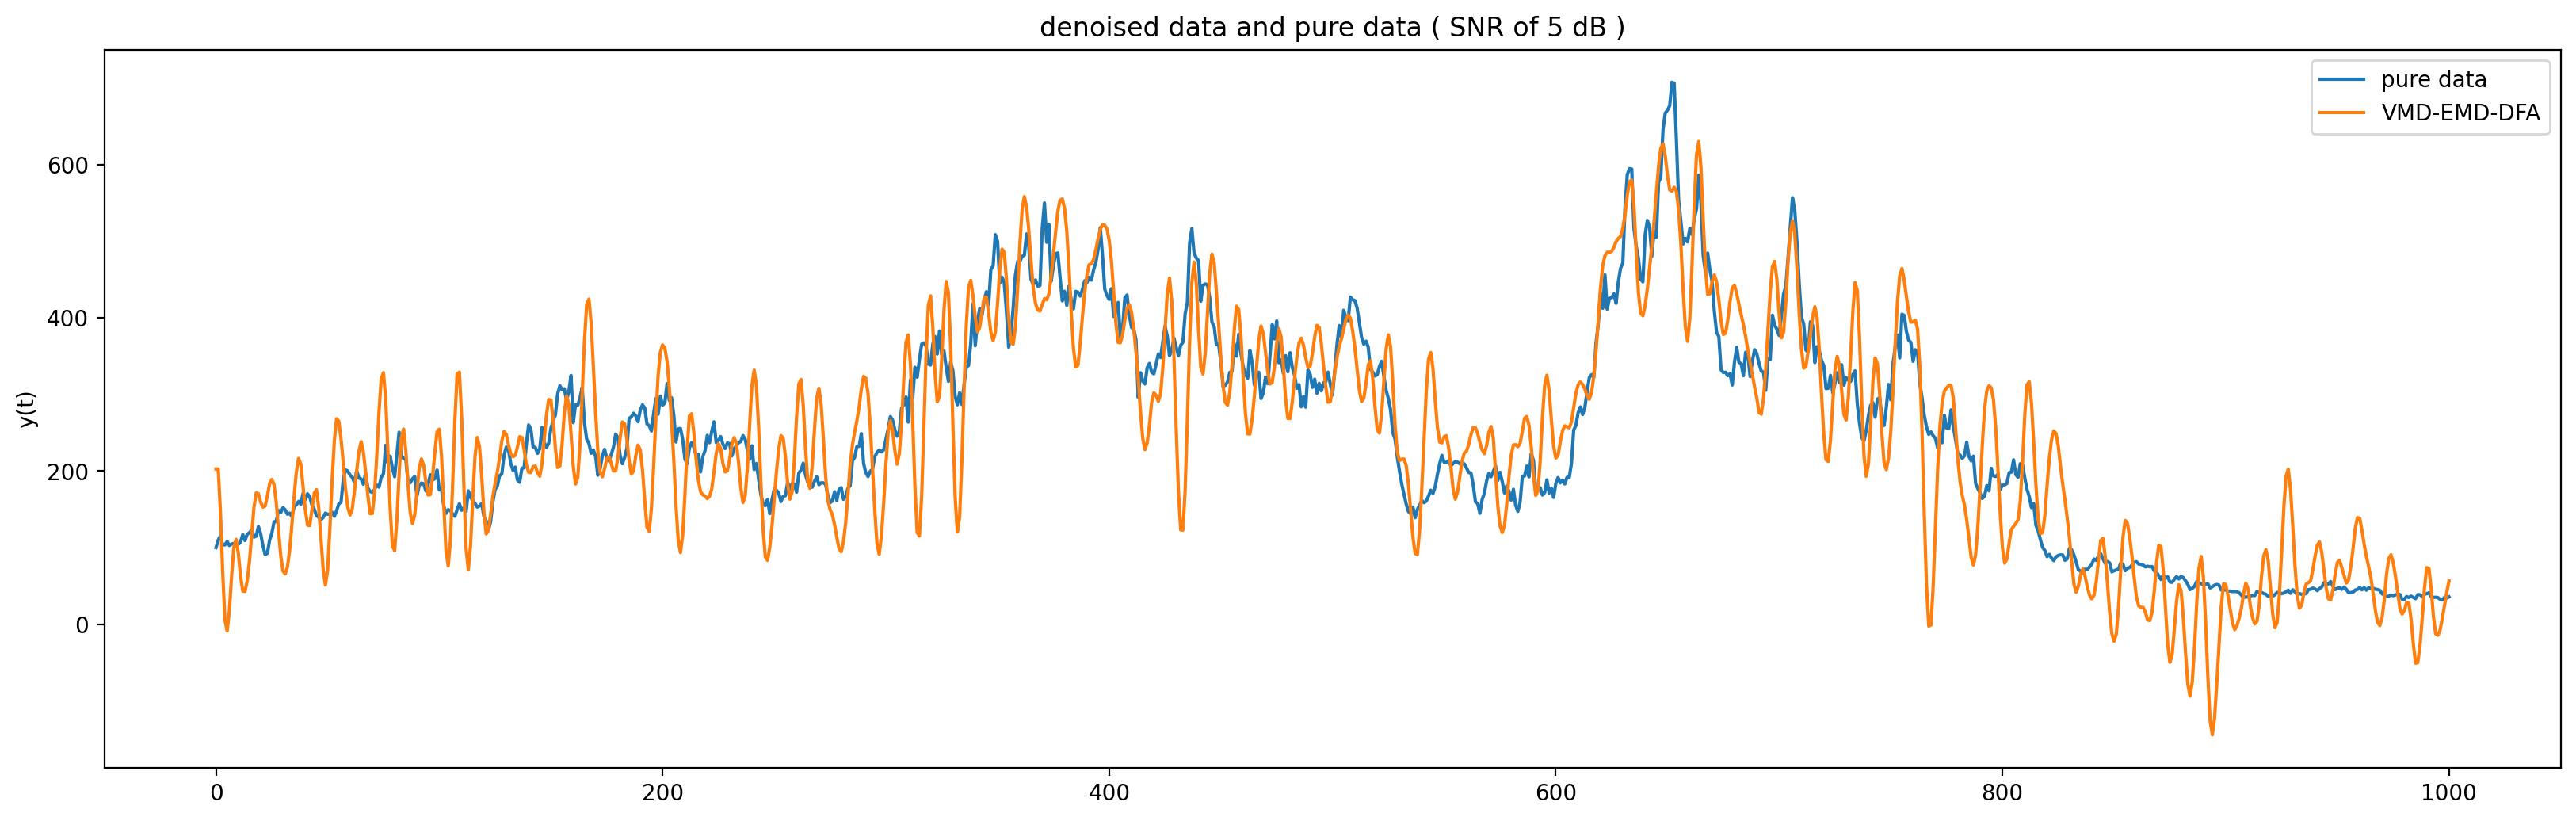

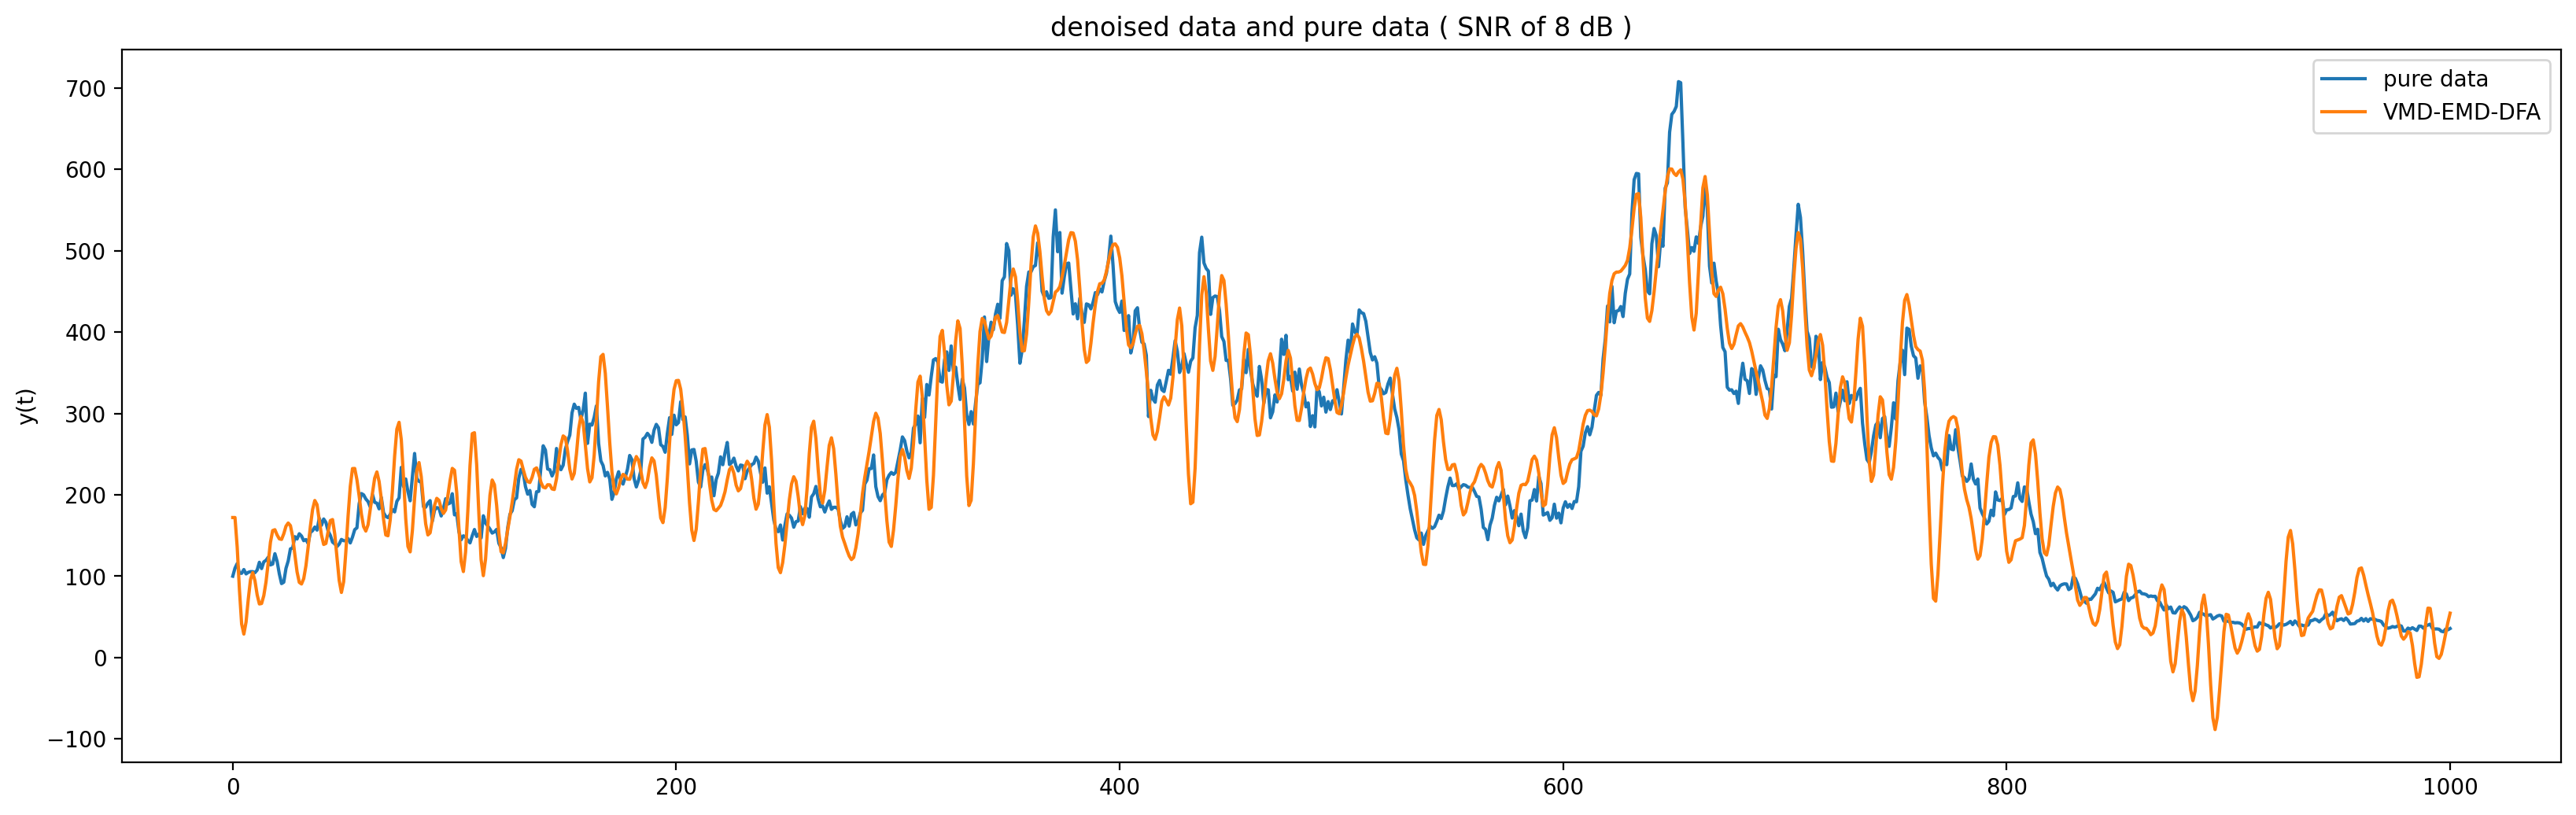

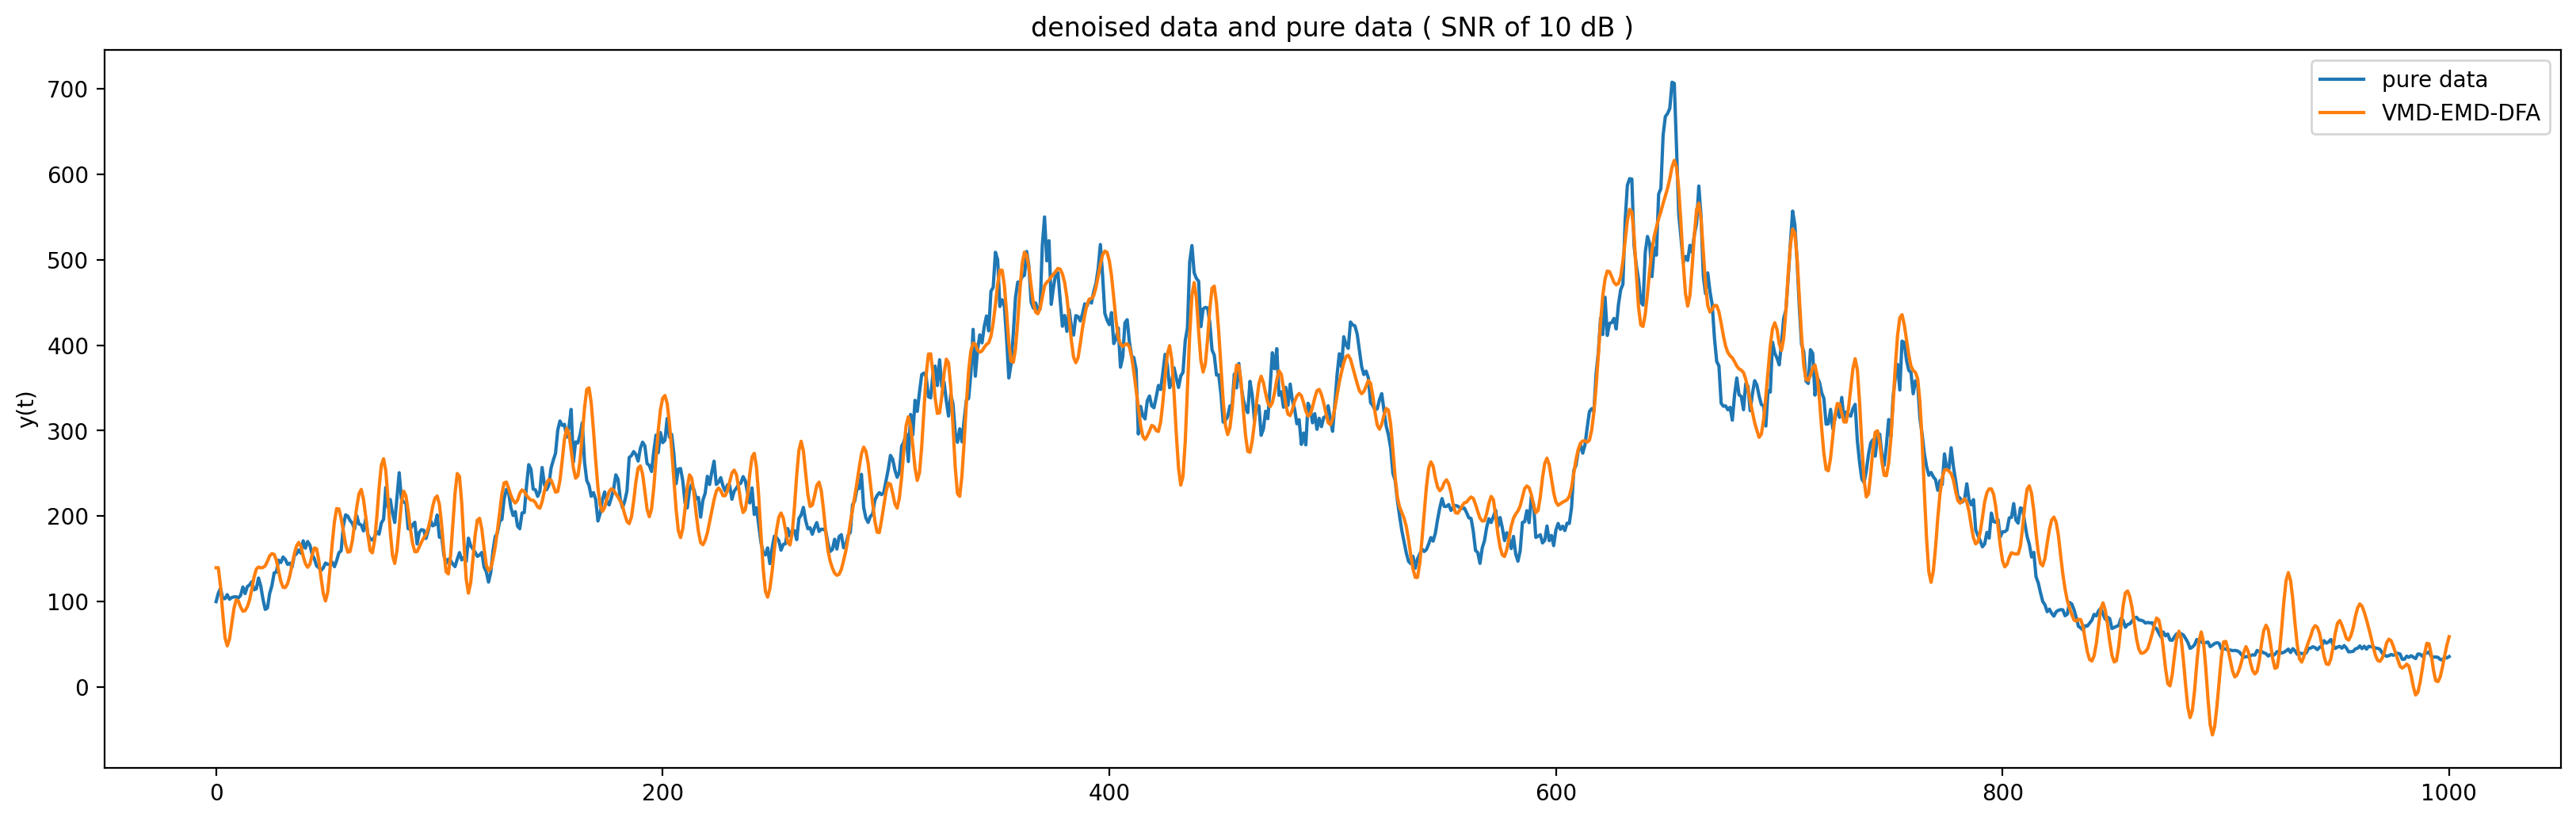

In [67]:
from sklearn.metrics import mean_squared_error
vmd_EMD_snr_list = []
vmd_EMD_rmse_list = []
vmd_EMD_nsignal = []
count = 0
for i in lst:
    noisy = add_noise(y_t,i,show = False)
   
    #print(J,K)
    nsiganl = denoise_vmd_emd(noisy,emd_num[count])
    vmd_EMD_nsignal.append(nsiganl)
    
    
    # plot
    plt.figure(figsize=(20,6),dpi=200)
    plt.title('denoised data and pure data ( SNR of '+str(i)+' dB )')
    plt.ylabel('y(t)')
    plt.plot(y_t,label = 'pure data')
    plt.plot(nsiganl,label = 'VMD-EMD-DFA')
    #plt.plot(noisy,label = 'noisy data')
    plt.legend()
    plt.savefig("./vmd emd denosed "+str(i))
    plt.show()
    
    snr = calculate_snr(y_t,nsiganl)
    rmse = mean_squared_error(y_t, nsiganl, squared=False)
    vmd_EMD_snr_list.append(snr)
    vmd_EMD_rmse_list.append(rmse)
    count = count +1

In [68]:
vmd_EMD_snr_list

[8.554189799957385, 12.366834987021003, 15.149699048346626, 17.22228706225082]

In [69]:
vmd_EMD_rmse_list

[104.49702212918227, 67.37079234487295, 48.90220614119905, 38.52113291522452]

## plot

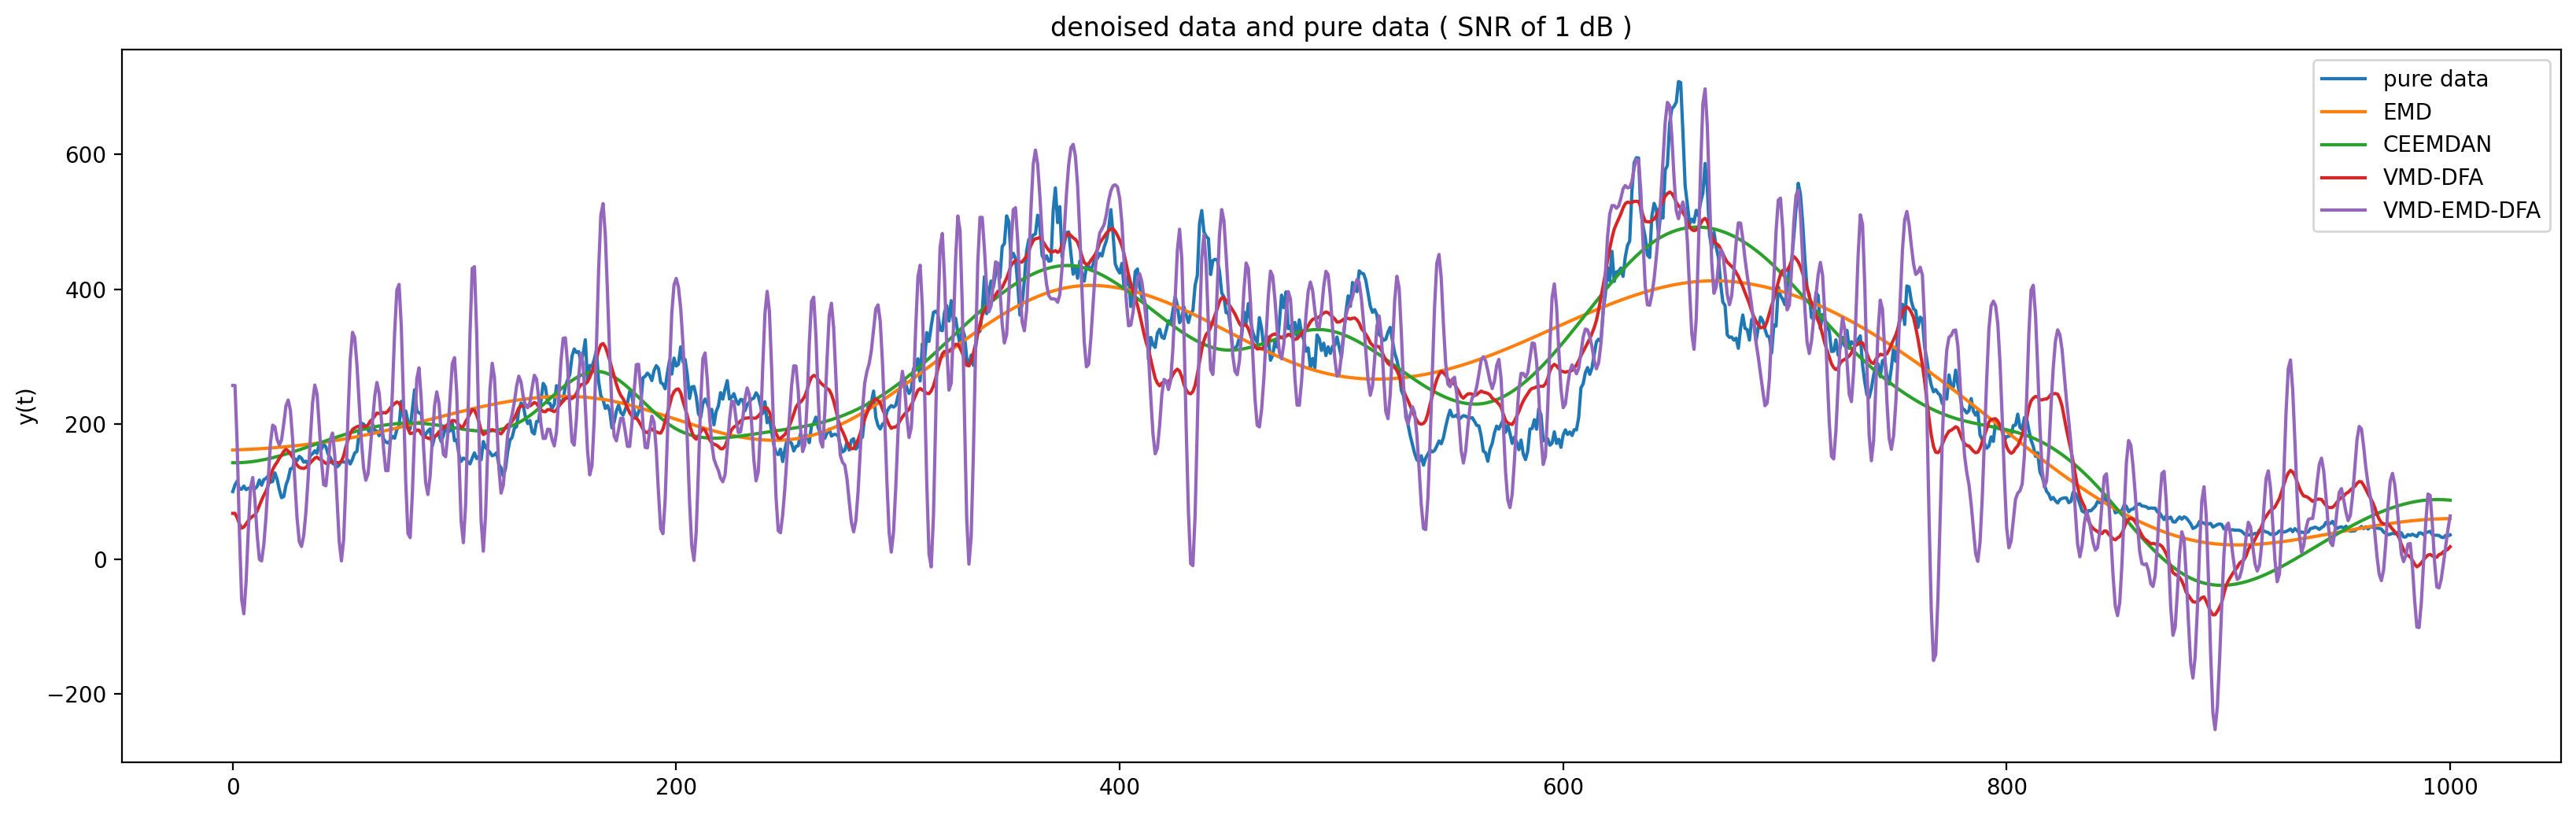

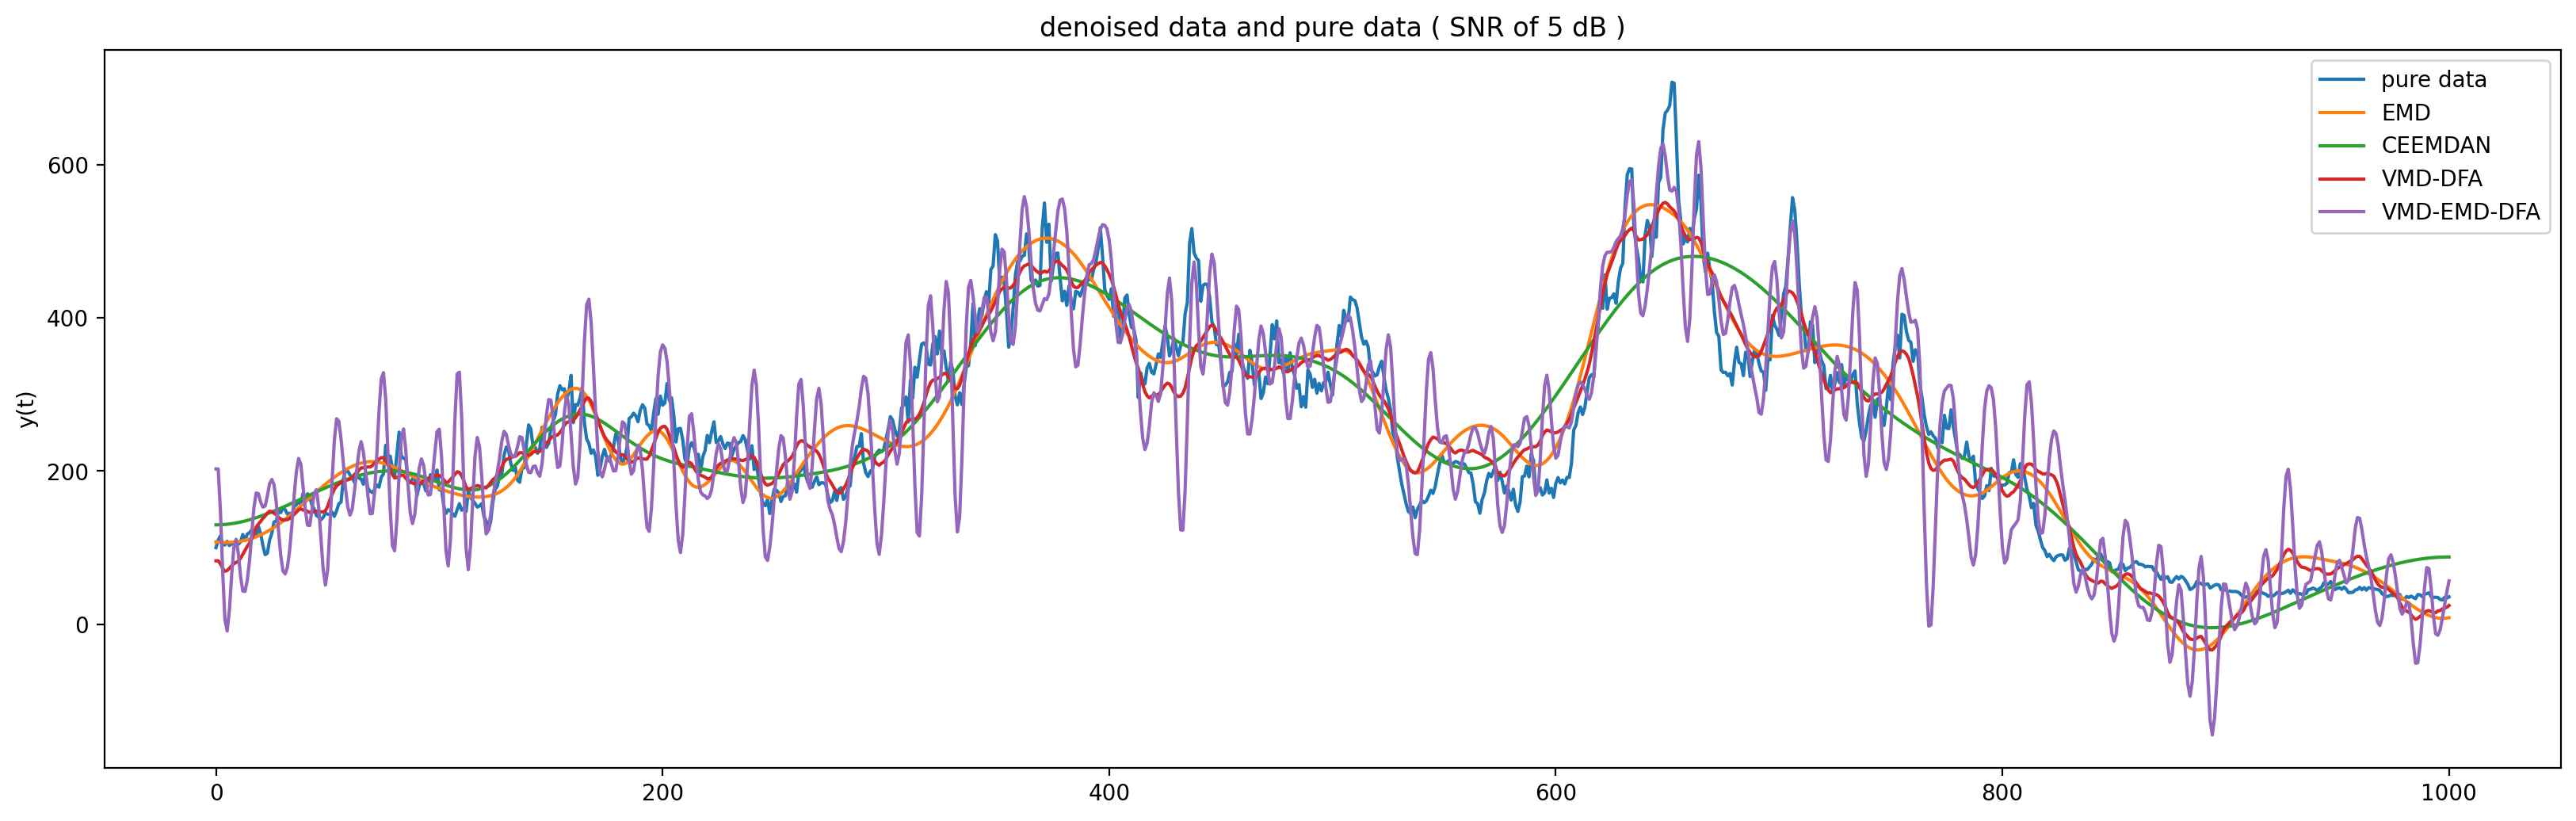

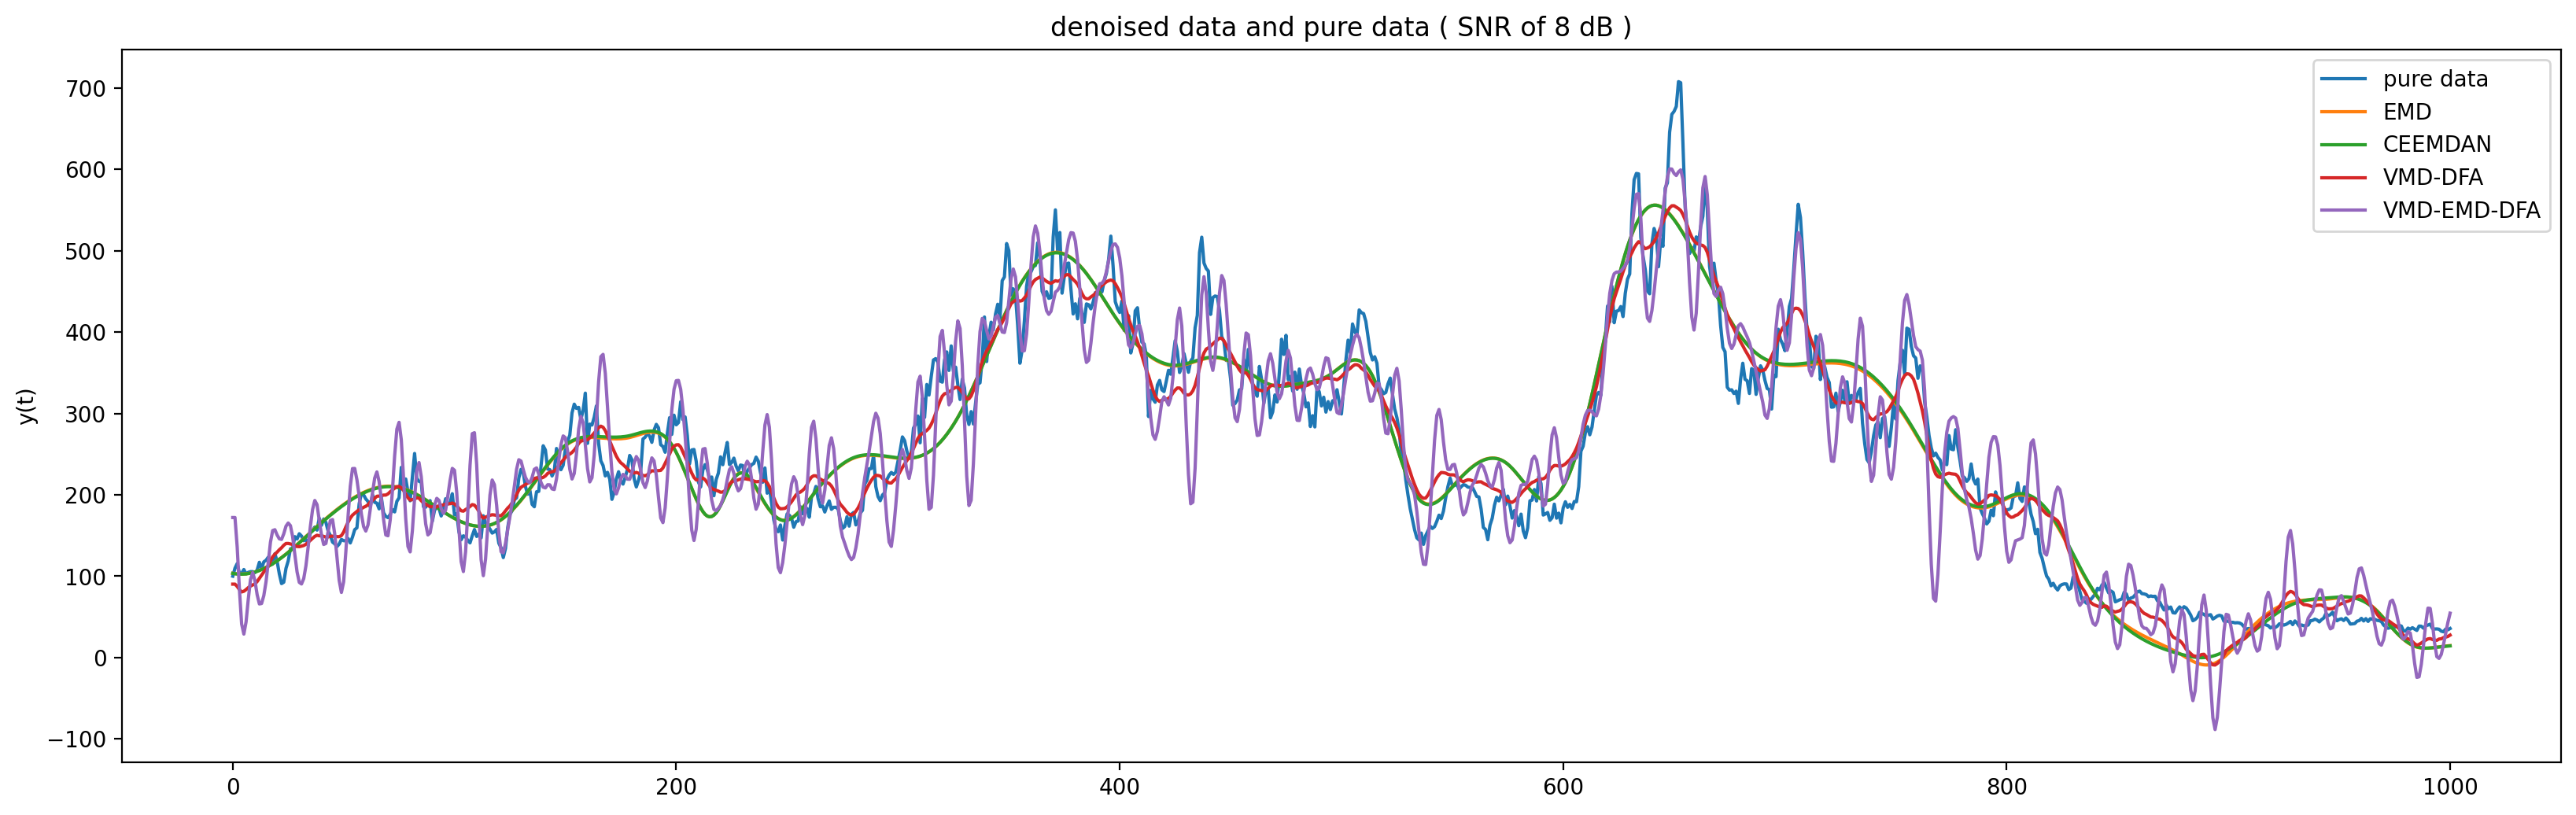

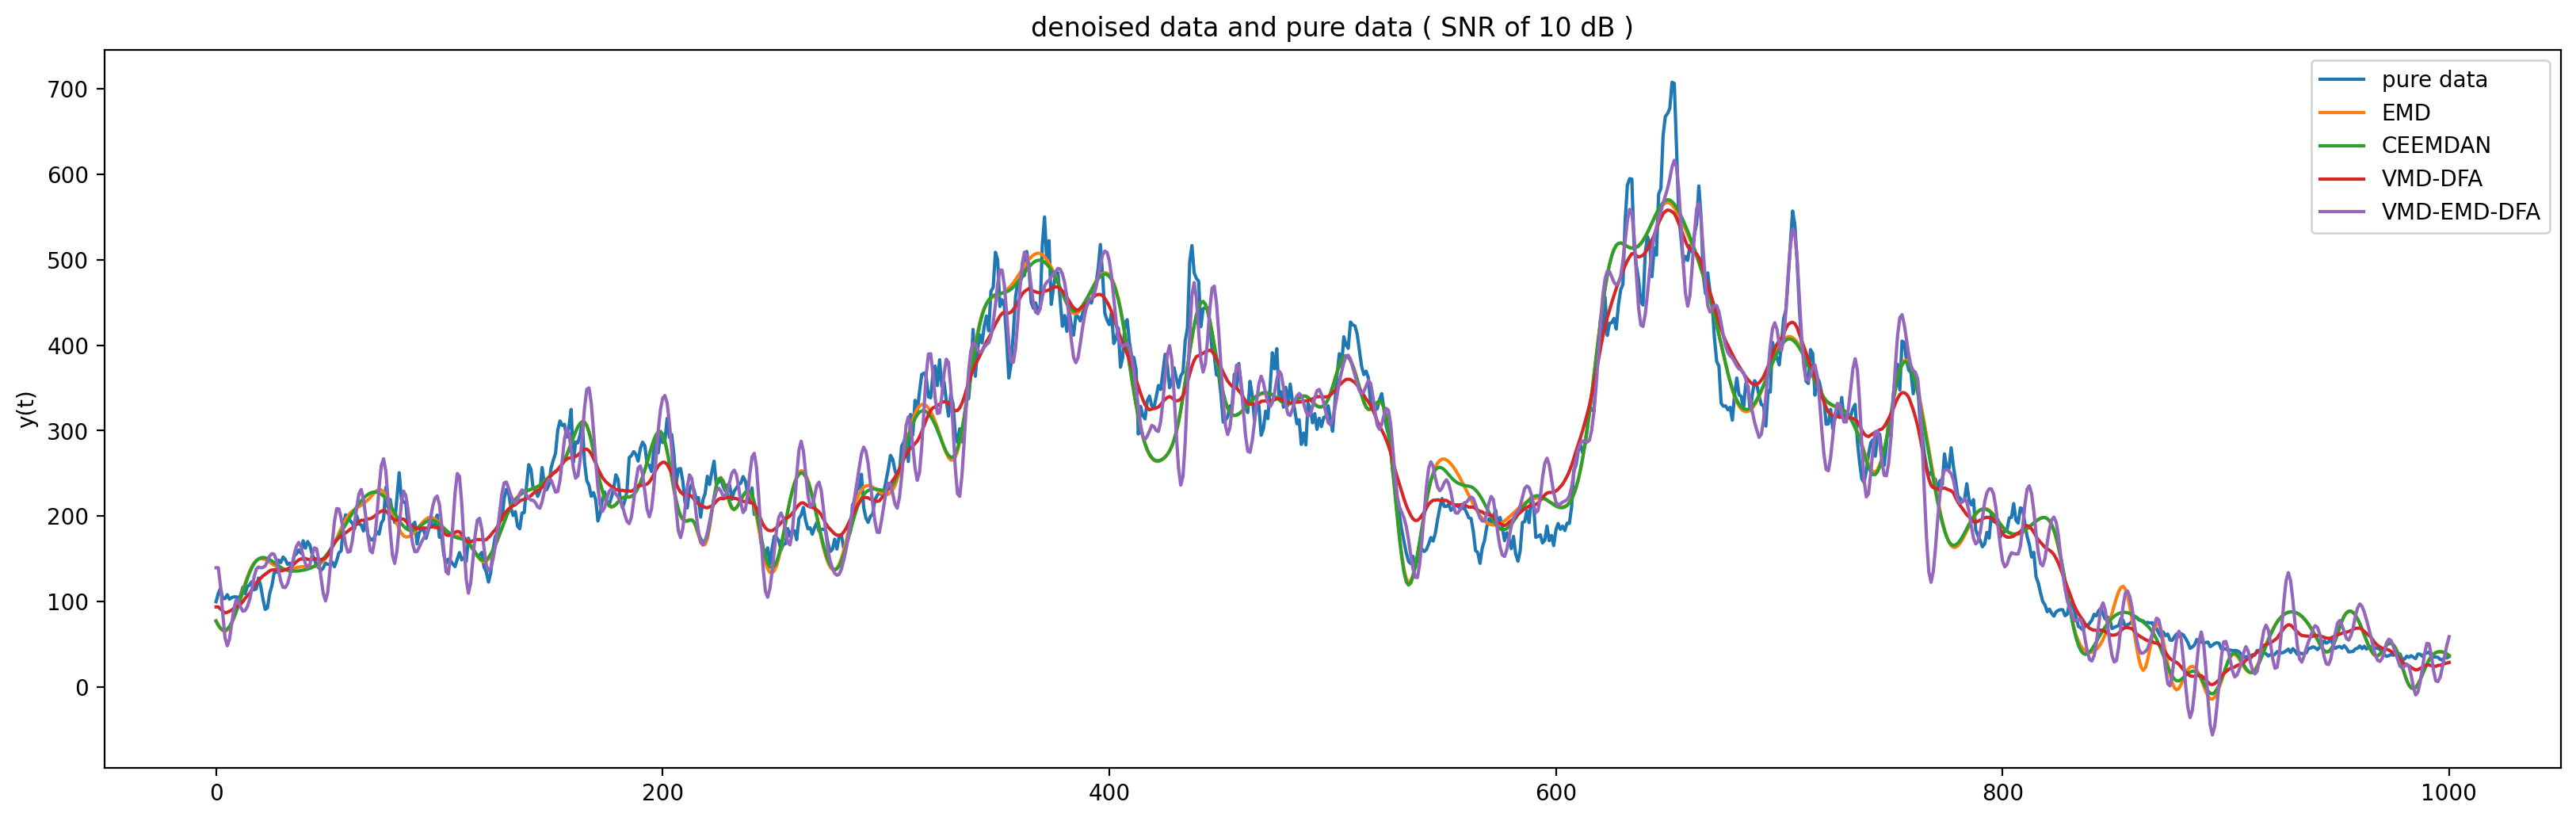

In [72]:
for i in range(4):
    plt.figure(figsize=(20,6),dpi=200)
    plt.plot( y_t,label = 'pure data')
    #plt.plot(t, vmd_EMD_nsignal[i],label = 'VMD-EMD-DFA')
    plt.plot(emd_nsignal[i],label = 'EMD')
    plt.plot(ceemdan_nsignal[i],label = 'CEEMDAN')
    plt.plot(vmd_nsignal[i],label = 'VMD-DFA')
    plt.plot(vmd_EMD_nsignal[i],label = 'VMD-EMD-DFA')
    
    plt.title('denoised data and pure data ( SNR of '+str(lst[i])+' dB )')
    plt.ylabel('y(t)')
    plt.legend()
    plt.savefig("./"+'denoised '+str(lst[i])+".jpg")
    plt.show()

# store snr and rmse

In [73]:
snr_df = pd.DataFrame([emd_snr_list,ceemdan_snr_list,vmd_snr_list,vmd_EMD_snr_list])

In [74]:
snr_df = snr_df.T

In [75]:
snr_df.columns = ['EMD','CEEMDAN','VMD-DFA','VMD-EMD-DFA']

In [76]:
snr_df

EMD    CEEMDAN    VMD-DFA  VMD-EMD-DFA
0  12.585419  13.549275  14.106428     8.554190
1  15.391764  14.751065  16.799497    12.366835
2  16.252992  16.259653  18.246977    15.149699
3  17.565126  17.728559  18.929572    17.222287

In [77]:
snr_df.to_csv('./random_walk_snr_df.csv')

In [78]:
rmse_df = pd.DataFrame([emd_rmse_list,ceemdan_rmse_list,vmd_rmse_list,vmd_EMD_rmse_list])

In [79]:
rmse_df = rmse_df.T

In [80]:
rmse_df.columns = ['EMD','CEEMDAN','VMD-DFA','VMD-EMD-DFA']

In [81]:
rmse_df

EMD    CEEMDAN    VMD-DFA  VMD-EMD-DFA
0  65.696531  58.796255  55.143206   104.497022
1  47.558180  51.198846  40.442552    67.370792
2  43.068904  43.035886  34.234545    48.902206
3  37.030291  36.340043  31.647164    38.521133

In [82]:
rmse_df.to_csv('./random_walk_rmse_df.csv')